# MACHINE LEARNING PROJECT

Nous proposons d'étudier et d'établir un algorithme de machine learning pour prédire le cours de l'indice S&P500

- Lianghe Dai
- Léo Dalbin
- Mathis Nguyen
- Xavier Toisoul
- Eliot Vu


--------------------------------------------------------------------

--------------------------------------------------------------------

# INSTALL PACKAGES


In [ ]:
# !pip install ta
# !pip install scikeras
# !pip install scikit-learn keras
# !pip install scikeras tensorflow scikit-learn
# !pip install pingouin
# !pip install xgboost
# !pip install tensorflow
# !pip install pmdarima
# !pip install prophet

--------------------------------------------------------------------

--------------------------------------------------------------------

In [2]:
pip freeze > requirements.txt

# IMPORT PACKAGES


In [12]:
# Financial Packages :
import yfinance as yf
import ta

# Mathematical Packages :
import numpy as np
import pandas as pd

# Plotting Packages :
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

# Statistical Packages
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import scipy.stats as stats
import pingouin as pg

--------------------------------------------------------------------

--------------------------------------------------------------------

# DATA : Collection, Viewing, Cleaning

## Collect Data from Yahoo Finance



- Defining the ticker of the asset
- Choising a Time Frame for the Price Prediction

In [28]:
asset = ['^GSPC', '^IXIC','TSLA', 'LOTB.BR', 'MC.PA', 'BLK', 'AAPL']
macro_indicators = ['DX-Y.NYB', '^VIX', '^TNX', 'CL=F', 'GC=F']
tickers=asset + macro_indicators
timeframe = '1d'
backtest_period = '5y'

- Collecting Data

In [29]:
data = yf.download(tickers=tickers,
                         period=backtest_period,
                         interval=timeframe)

[*********************100%***********************]  12 of 12 completed


## Viewing Data Info (what it contains)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1294 entries, 2020-03-06 to 2025-03-07
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, AAPL)       1256 non-null   float64
 1   (Close, BLK)        1256 non-null   float64
 2   (Close, CL=F)       1259 non-null   float64
 3   (Close, DX-Y.NYB)   1258 non-null   float64
 4   (Close, GC=F)       1259 non-null   float64
 5   (Close, LOTB.BR)    1283 non-null   float64
 6   (Close, MC.PA)      1283 non-null   float64
 7   (Close, TSLA)       1256 non-null   float64
 8   (Close, ^GSPC)      1256 non-null   float64
 9   (Close, ^IXIC)      1256 non-null   float64
 10  (Close, ^TNX)       1257 non-null   float64
 11  (Close, ^VIX)       1257 non-null   float64
 12  (High, AAPL)        1256 non-null   float64
 13  (High, BLK)         1256 non-null   float64
 14  (High, CL=F)        1259 non-null   float64
 15  (High, DX-Y.NYB)    1258 non-null   f

In this dataset, we have, for each asset (S&P500, VIX, 10Y Yield) :
- 6 columns : The OHLC Price (Open, High, Low, Close), the OHLC Price and the Volume
- We have historic price from 2019 to 2024

## Cleaning Data

- We check NaN Values

In [31]:
row, column = np.where(pd.isna(data))
print(list(zip(row, column)))

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 59), (25, 5), (25, 6), (25, 17), (25, 18), (25, 29), (25, 30), (25, 41), (25, 42), (25, 53), (25, 54), (39, 5), (39, 6), (39, 17), (39, 18), (39, 29), (39, 30), (39, 41), (39, 42), (39, 53), (39, 54), (55, 0), (55, 1), (55, 2), (55, 3), (55, 4), (55, 7), (55, 8), (55, 9), (55, 10), (55, 11), (55, 12), (55, 13), (55, 14), (55, 15), (55, 16), (55, 19), (55, 20), (55, 21), (55, 22), (55, 23), (55, 24), (55, 25), (55, 26), (55, 27), (55, 28), (55, 31), (55, 32), (55, 33), (55, 34), (55, 35), (55, 36), (55, 37), (55, 3

- Let's clean the dataset

In [32]:
# Drop NaN Values
clean_data = data.dropna(inplace=False)

# We could also use the mean/Q2 to replace NaN values
# clean_data = data.fillna(data.mean())
# clean_data = data.fillna(data.median())

# Drop Duplicated Values
clean_data = clean_data[~clean_data.index.duplicated(keep='first')]

For the Mean of the Median, it's difficult to use it directly on prices as the prices ar increasing, so a rolling mean or a rolling median would be better than just mean or median

In [33]:
# clean_data = data.fillna(data.rolling(10).mean())
# clean_data = data.fillna(data.rolling(10).median())

## Log Returns

In [34]:
#For Each Asset/Tickers
for ticker in tickers :

    # We Compute the Log Returns
    clean_data['Log Returns', ticker] = 100*np.log(clean_data['Close', ticker]/clean_data['Close', ticker].shift(-1))

# Cleaning the latest value that is a NaN Value
clean_data = clean_data.dropna()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


We could, here, use the mean / median as the Log Returns as stationnary (property of log transformation)

In [35]:
# clean_data = data.fillna(data.mean())
# clean_data = data.fillna(data.median())

## Augmented Dickey-Fuller test

In [36]:
adf_resulsts = adfuller(clean_data['Log Returns', '^GSPC'])

print(
    f"Statistique ADF : {round(adf_resulsts[0],2)} \n"
    f"p-value : {round(adf_resulsts[1],20)} \n"
    f"Lags utilisés : {adf_resulsts[2]} \n"
    f"Valeurs critiques : \n"
    f"  - À 1% : {adf_resulsts[4]['1%']} \n"
    f"  - À 5% : {adf_resulsts[4]['5%']} \n"
    f"  - À 10% : {adf_resulsts[4]['10%']} \n"
    f"Maximized Information Criterion (AIC) : {adf_resulsts[5]}"
    )

Statistique ADF : -9.39 
p-value : 6.4743e-16 
Lags utilisés : 13 
Valeurs critiques : 
  - À 1% : -3.4356819860439574 
  - À 5% : -2.863894574114006 
  - À 10% : -2.568023609111511 
Maximized Information Criterion (AIC) : 3630.502220655394


### Saving ADF Test Results

In [37]:
adf_resulsts_dict = {
    "Statistique ADF" : round(adf_resulsts[0],2),
    "p-value" : round(adf_resulsts[1],20),
    "Lags utilisés" : adf_resulsts[2],
    "Valeurs critiques" :
        {
            " - À 1%" : adf_resulsts[4]['1%'],
            "  - À 5%" : adf_resulsts[4]['5%'],
            "  - À 10%" : adf_resulsts[4]['10%'],
        },
    "Maximized Information Criterion (AIC)" : adf_resulsts[5],
}
adf_resulsts_dict

{'Statistique ADF': -9.39,
 'p-value': 6.4743e-16,
 'Lags utilisés': 13,
 'Valeurs critiques': {' - À 1%': -3.4356819860439574,
  '  - À 5%': -2.863894574114006,
  '  - À 10%': -2.568023609111511},
 'Maximized Information Criterion (AIC)': 3630.502220655394}

- We could use a lag of 8
- Let's use the ACF function to cross information

## Autocorrelation Function (ACF)

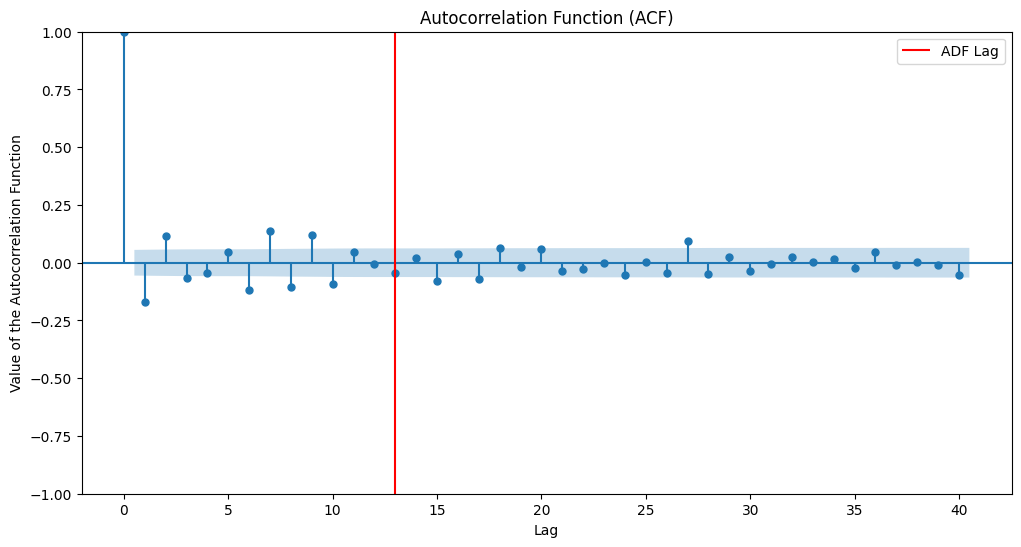

In [38]:
plt.figure(figsize=(12, 6))
plot_acf(clean_data['Log Returns', '^GSPC'], lags=40, ax=plt.gca())
plt.vlines(x=adf_resulsts_dict["Lags utilisés"], ymin=-1, ymax=1, color='r', linestyle='-', label="ADF Lag")
plt.legend()
plt.xlabel("Lag")
plt.ylabel("Value of the Autocorrelation Function")
plt.title('Autocorrelation Function (ACF)')
plt.show()

## Partial Autocorrelation Function (PACF)

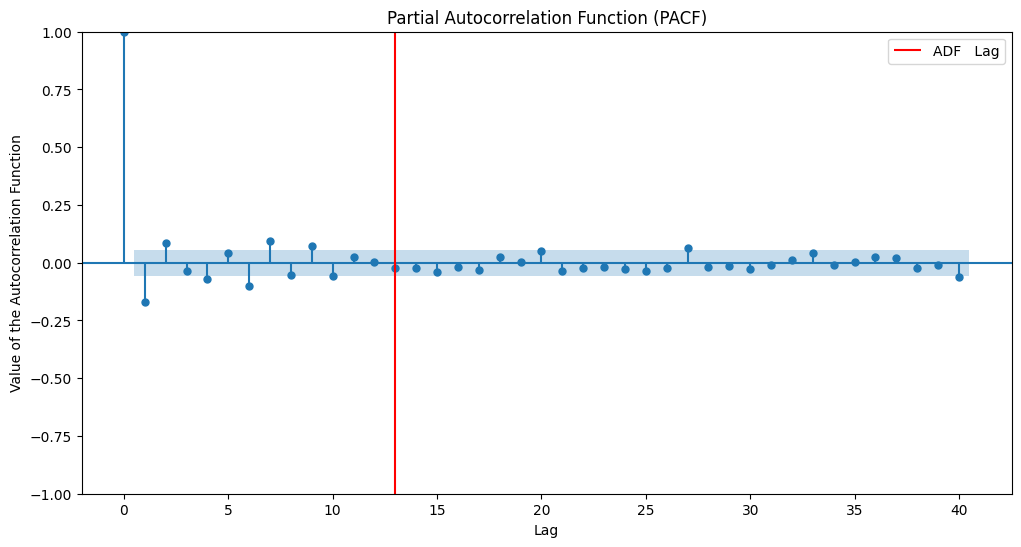

In [39]:
plt.figure(figsize=(12, 6))
plot_pacf(clean_data['Log Returns', '^GSPC'], lags=40, ax=plt.gca())
plt.vlines(x=adf_resulsts_dict["Lags utilisés"], ymin=-1, ymax=1, color='r', linestyle='-', label="ADF   Lag")
plt.legend()
plt.xlabel("Lag")
plt.ylabel("Value of the Autocorrelation Function")
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

- Finally, a lag of 9 seems the best choice

--------------------------------------------------------------------

--------------------------------------------------------------------

# INDICATORS

## Source of Indicators and Asset

In [40]:
src = 'Close'
asset_to_indicator = '^GSPC'

## Moving Average Convergence Divergence (MACD)

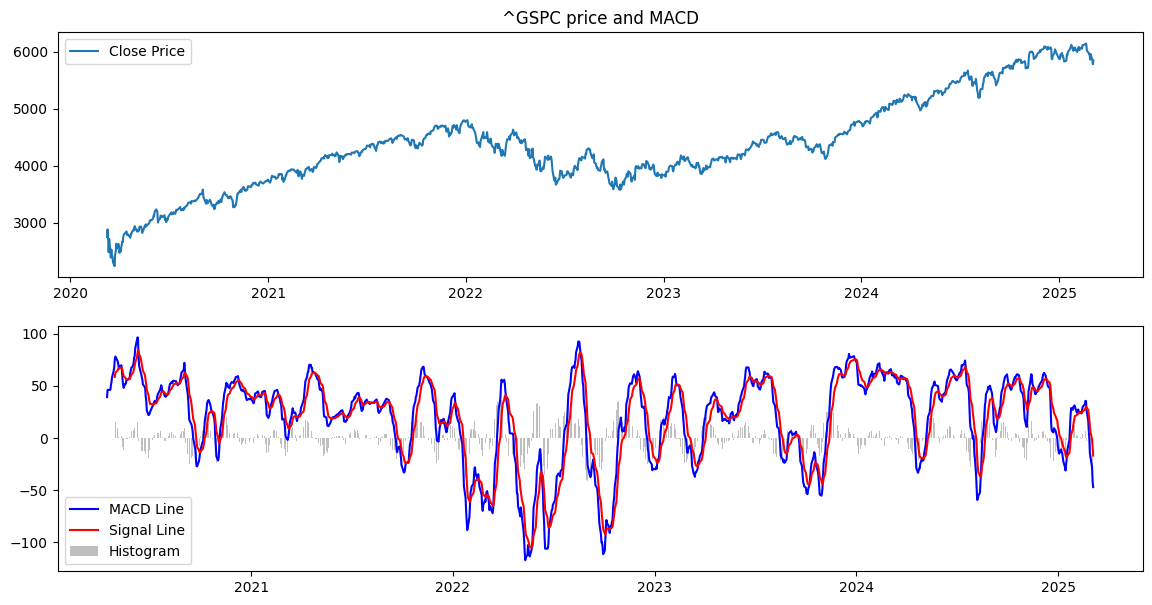

In [41]:
# Creating MACD Function
def MACD(data, tickers, src):

  # For each asset
  for asset in tickers:

    # Creating the MACD Indicator with Technical Analysis (ta package)
    macd = ta.trend.MACD(data[src, asset])
    data[f'MACD_{asset}', 'MACD'] = macd.macd()
    data[f'MACD_{asset}', 'MACD_Signal'] = macd.macd_signal()
    data[f'MACD_{asset}', 'MACD_Diff'] = macd.macd_diff()

# Creating MACD Indicator
MACD(clean_data, tickers, src)

plt.figure(figsize=(14,7))

# Plotting Close Price
plt.subplot(2,1,1)
plt.plot(clean_data[src, asset_to_indicator],label='Close Price')
plt.title(f'{asset_to_indicator} price and MACD')
plt.legend()

# Plottinf MACD
plt.subplot(2,1,2)
plt.plot(clean_data[f'MACD_{asset_to_indicator}', 'MACD'],label='MACD Line',color='blue')
plt.plot(clean_data[f'MACD_{asset_to_indicator}', 'MACD_Signal'], label='Signal Line', color='red')
plt.bar(clean_data.index, clean_data[f'MACD_{asset_to_indicator}', 'MACD_Diff'],label='Histogram',color='grey',alpha=0.5)
plt.legend()

plt.show()

## Relative Strenght Index (RSI)

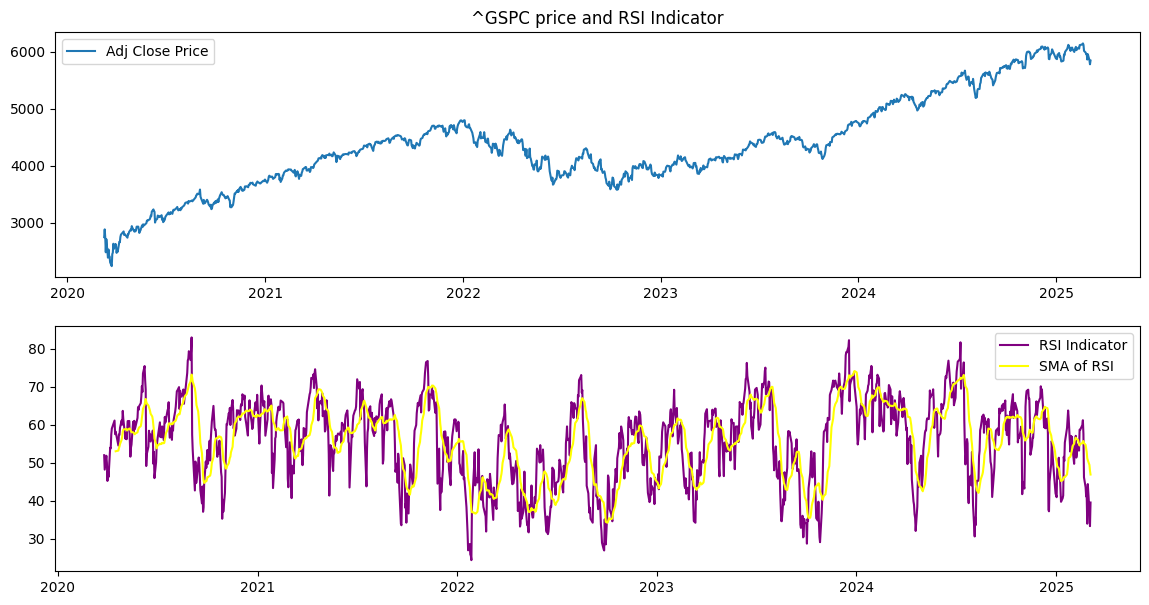

In [42]:
# Creating RSI Function
def RSI(data, tickers, src, window=14):

  # For each asset
  for asset in tickers:

    # Creating the RSI Indicator with Technical Analysis (ta package)
    data[asset, 'RSI'] = ta.momentum.RSIIndicator(data[src, asset], window=window).rsi()
    data[asset, 'SMA_RSI'] = data[asset, 'RSI'].rolling(window=window).mean()


# Default Value
window = 14

# Creating RSI Indicator
RSI(clean_data, tickers, src, window)

plt.figure(figsize=(14,7))

# Plotting Close Price
plt.subplot(2,1,1)
plt.plot(clean_data[src, asset_to_indicator],label='Adj Close Price')
plt.title(f'{asset_to_indicator} price and RSI Indicator')
plt.legend()

# Plotting RSI
plt.subplot(2,1,2)
plt.plot(clean_data[asset_to_indicator, 'RSI'],label='RSI Indicator',color='purple')
plt.plot(clean_data[asset_to_indicator, 'SMA_RSI'],label='SMA of RSI',color='yellow')
plt.legend()

plt.show()

## Simple Moving Average (SMA)

<ipython-input-43-84ae988beb02>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[asset, f'MA_{lenght}'] = data[src, asset].rolling(window=lenght).mean()
<ipython-input-43-84ae988beb02>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[asset, f'MA_{lenght}'] = data[src, asset].rolling(window=lenght).mean()
<ipython-input-43-84ae988beb02>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

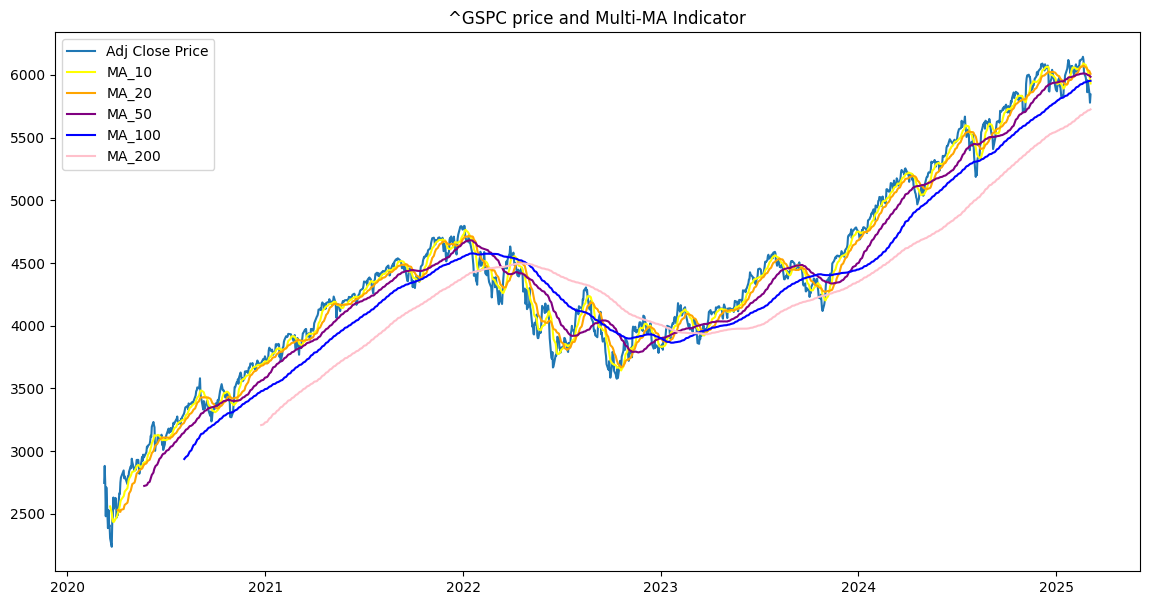

In [43]:
#Multi_MA Function
def Multi_MA(data, tickers, src, Lenght_MA):

  # For each asset
  for asset in tickers:
      # Creating the Multi-MA with Technical Analysis (ta package)
      for lenght in Lenght_MA:
          data[asset, f'MA_{lenght}'] = data[src, asset].rolling(window=lenght).mean()

# Default Values
Lenght_MA = [10, 20, 50, 100, 200]

# Creating Multi_MA Indicator
Multi_MA(clean_data, tickers, src, Lenght_MA)

plt.figure(figsize=(14,7))

# Plotting Close Price & Multi-MA
plt.plot(clean_data[src, asset_to_indicator],label='Adj Close Price')
plt.plot(clean_data[asset_to_indicator, 'MA_10'],label='MA_10',color='yellow')
plt.plot(clean_data[asset_to_indicator, 'MA_20'],label='MA_20',color='orange')
plt.plot(clean_data[asset_to_indicator, 'MA_50'],label='MA_50',color='purple')
plt.plot(clean_data[asset_to_indicator, 'MA_100'],label='MA_100',color='blue')
plt.plot(clean_data[asset_to_indicator, 'MA_200'],label='MA_200',color='pink')
plt.title(f'{asset_to_indicator} price and Multi-MA Indicator')
plt.legend()

plt.show()

## Bollinger Bands

<ipython-input-44-e375ffac52d1>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[asset, f'SMA_{window}'] = data[src, asset].rolling(window=window).mean()
<ipython-input-44-e375ffac52d1>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[asset, f'STD_{window}'] = data[src, asset].rolling(window=window).std()
<ipython-input-44-e375ffac52d1>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at o

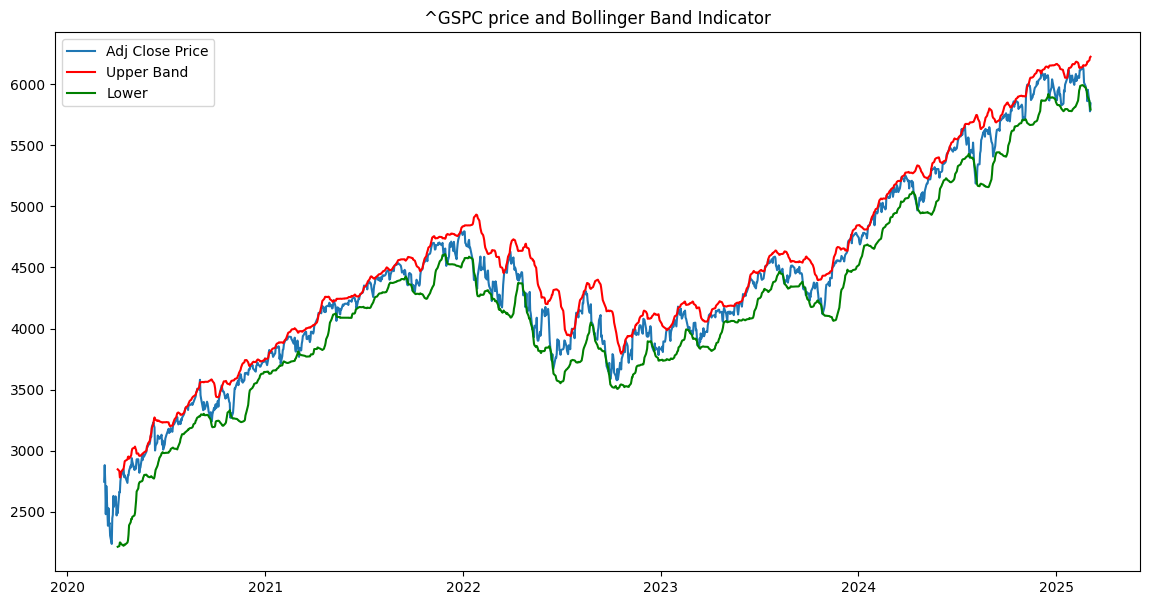

In [44]:
# Creating Bollinger Bands Function
def BB(data, tickers, src, window):

  # For each asset
  for asset in tickers:

      # SMA sur 20 jours
      data[asset, f'SMA_{window}'] = data[src, asset].rolling(window=window).mean()

      # Écart-type sur 20 jours
      data[asset, f'STD_{window}'] = data[src, asset].rolling(window=window).std()

      # Creating the Bollinger Bands Indicator
      data[asset, 'Upper_Band'] = data[asset, f'SMA_{window}'] + (2 * data[asset, f'STD_{window}'])
      data[asset, 'Lower_Band'] = data[asset, f'SMA_{window}'] - (2 * data[asset, f'STD_{window}'])

#Default Value
window = 20

# Creating Bollinger Bands Indicator
BB(clean_data, tickers, src, window)

plt.figure(figsize=(14,7))

# Plotting Close Price & Multi-MA
plt.plot(clean_data[src, asset_to_indicator],label='Adj Close Price')
plt.plot(clean_data[asset_to_indicator, 'Upper_Band'],label='Upper Band',color='red')
plt.plot(clean_data[asset_to_indicator, 'Lower_Band'],label='Lower',color='green')
plt.title(f'{asset_to_indicator} price and Bollinger Band Indicator')
plt.legend()

plt.show()

## Cleaning Data

In [45]:
## Indicators created new NaN Values

# Drop NaN Values
clean_data = clean_data.dropna(inplace=False)

# Drop Duplicated Values
clean_data = clean_data[~clean_data.index.duplicated(keep='first')]

--------------------------------------------------------------------

--------------------------------------------------------------------

# CORRELATION


## Correlation between data

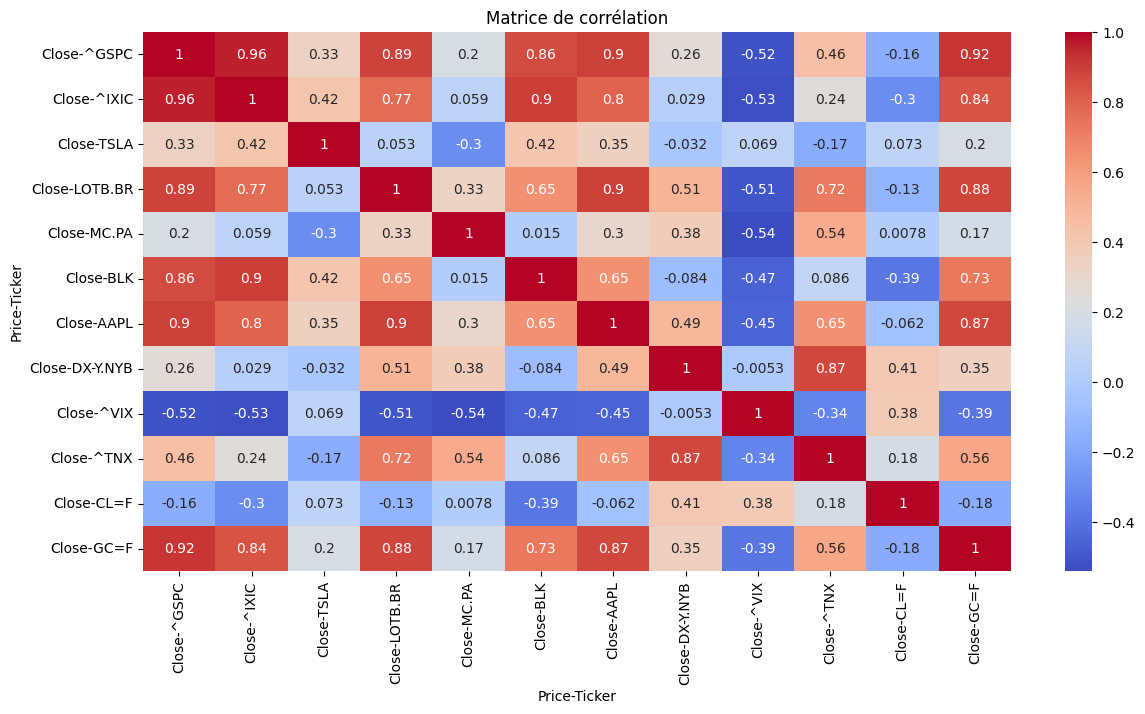

In [ ]:
# Matrice de corrélation
data_test = clean_data[[( 'Close', ticker) for ticker in np.concatenate((asset, macro_indicators), axis = 0)]]
corr_matrix = data_test.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

- Between Volume

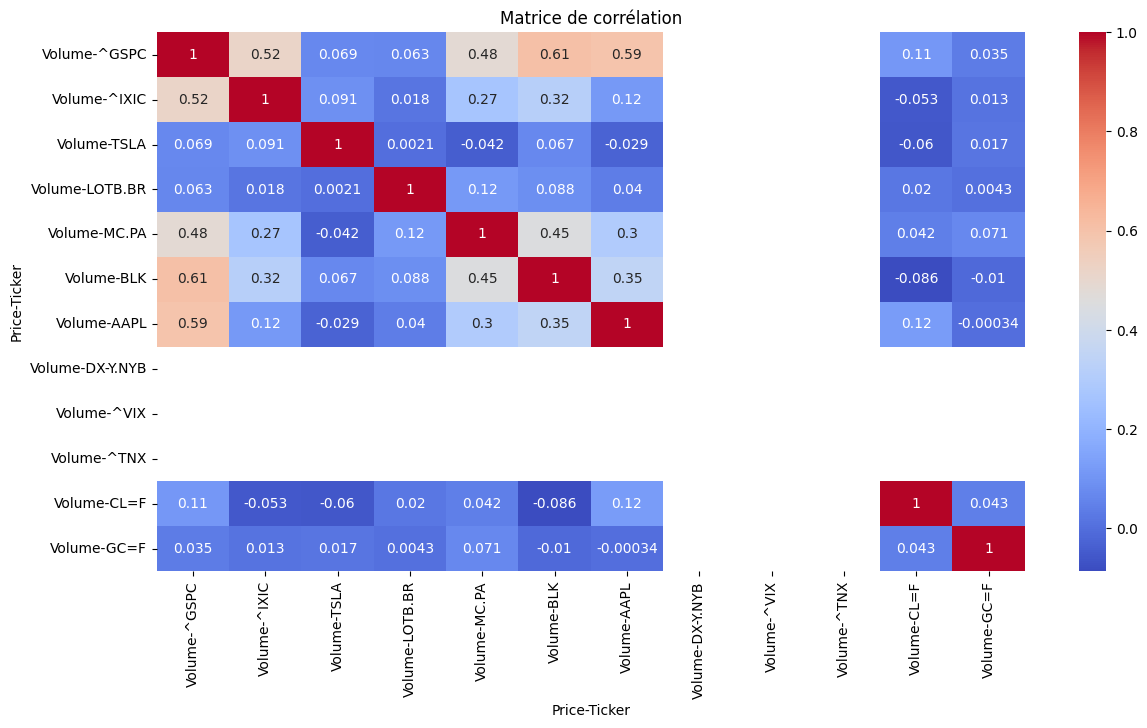

In [ ]:
# Matrice de corrélation
data_test = clean_data[[( 'Volume', ticker) for ticker in np.concatenate((asset, macro_indicators), axis = 0)]]
corr_matrix = data_test.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

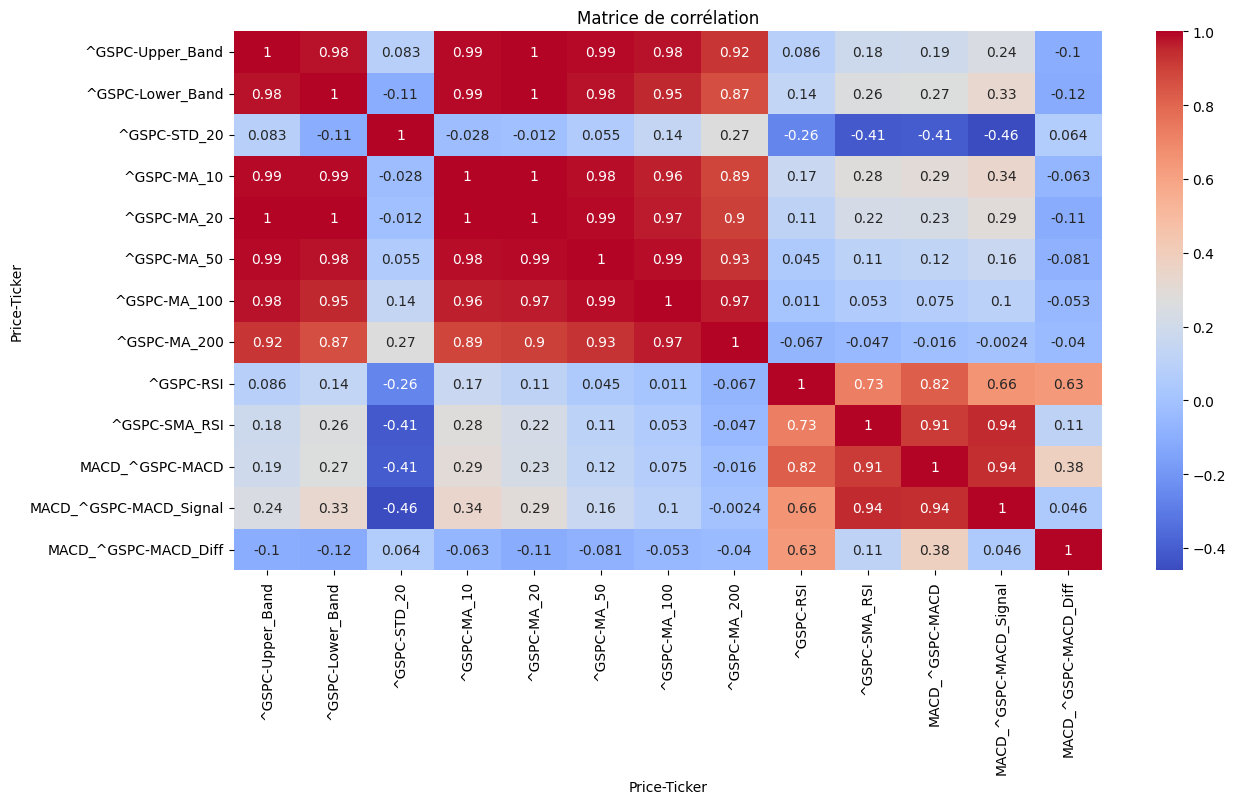

In [ ]:
# Matrice de corrélation
indicators = [('^GSPC', indicator) for indicator in ['Upper_Band', 'Lower_Band', 'STD_20', 'MA_10', 'MA_20', 'MA_50', 'MA_100', 'MA_200', 'RSI', 'SMA_RSI']] + [('MACD_^GSPC', 'MACD'), ('MACD_^GSPC', 'MACD_Signal'), ('MACD_^GSPC', 'MACD_Diff')]
data_test = clean_data[indicators]
corr_matrix = data_test.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [ ]:
# Example: Calculating the partial correlation between two variables, controlling for a third
partial_corr = pg.partial_corr(data=clean_data, x=('Close','^GSPC'), y=('Close' ,'^VIX'), covar =('^GSPC' ,'Upper_Band'))
print(partial_corr)

            n        r           CI95%          p-val
pearson  1045 -0.73531  [-0.76, -0.71]  3.076252e-178


--------------------------------------------------------------------

--------------------------------------------------------------------

# EVALUATION FUNCTIONS

## MSE & MAE

In [ ]:
# def evaluation_rmse_mae(model, X_train, y_train, y_test, y_pred):

#   # Evaluate the model
#   mse_train = mean_squared_error(y_train, model.predict(X_train))
#   mae_train = mean_absolute_error(y_train, model.predict(X_train))
#   mse_pred = mean_squared_error(y_test, y_pred)
#   mae_pred = mean_absolute_error(y_test, y_pred)
#   mse_pred_naive = mean_squared_error(pd.DataFrame(y_test).drop(0), pd.DataFrame(y_test).shift(1).drop(0))
#   mae_pred_naive = mean_absolute_error(pd.DataFrame(y_test).drop(0), pd.DataFrame(y_test).shift(1).drop(0))

#   xlabel = ['MSE', 'MAE', 'MSE Ratio']
#   bar_width = 0.20
#   index = np.arange(len(xlabel))
#   plt.bar(index,
#     [mse_train, mae_train, mse_pred/mse_train],
#     bar_width,
#     color='orange',
#     label='Train Data')

#   plt.bar(index + bar_width,
#     [mse_pred, mae_pred, mae_pred/mae_train],
#     bar_width,
#     color='red',
#     label='Test Data')

#   plt.bar(index + 2*bar_width,
#     [mse_pred_naive, mae_pred_naive, 0],
#     bar_width,
#     color='White',
#     edgecolor='black',
#     label='Naive Method')

#   plt.xlabel('Metrics')
#   plt.ylabel('Value of Metrics')
#   plt.title("Use MSE, MAE and Ratio to Detect a Potentiel Overfiting &" + "\n" + "Compare Performance with a Naive Model")
#   plt.xticks(index + bar_width / 2, labels=xlabel)
#   plt.legend()
#   plt.figure(figsize=(8, 6))

#   print(f"Mean Squared Error (MSE), for Train: {mse_train}")
#   print(f"Mean Absolute Error (MAE), for Train: {mae_train} \n")
#   print(f"Mean Squared Error (MSE), for Test: {mse_pred}")
#   print(f"Mean Absolute Error (MAE), for Test: {mae_pred} \n")
#   print(f"Mean Squared Error (MSE), naive methode: {mse_pred_naive}")
#   print(f"Mean Absolute Error (MAE), naive methode: {mae_pred_naive} \n")
#   print(f"MSE Ratio : MSE Prediction over MSE Train (MSER): {mse_pred/mse_train}")
#   print(f"MAE Ratio : MAE Prediction over MAE Train (MAER): {mae_pred/mae_train}")

In [46]:
def evaluation_rmse_mae(model, X_train, y_train, y_test, y_pred):
    # Evaluate the model
    mse_train = mean_squared_error(y_train, model.predict(X_train))
    mae_train = mean_absolute_error(y_train, model.predict(X_train))
    mse_pred = mean_squared_error(y_test, y_pred)
    mae_pred = mean_absolute_error(y_test, y_pred)

    # Use iloc to avoid dropping rows by index name (especially for Series)
    mse_pred_naive = mean_squared_error(y_test[1:], y_test[:-1])
    mae_pred_naive = mean_absolute_error(y_test[1:], y_test[:-1])

    xlabel = ['MSE', 'MAE', 'MSE Ratio']
    bar_width = 0.20
    index = np.arange(len(xlabel))

    plt.bar(index,
            [mse_train, mae_train, mse_pred / mse_train],
            bar_width,
            color='orange',
            label='Train Data')

    plt.bar(index + bar_width,
            [mse_pred, mae_pred, mae_pred / mae_train],
            bar_width,
            color='red',
            label='Test Data')

    plt.bar(index + 2 * bar_width,
            [mse_pred_naive, mae_pred_naive, 0],
            bar_width,
            color='White',
            edgecolor='black',
            label='Naive Method')

    plt.xlabel('Metrics')
    plt.ylabel('Value of Metrics')
    plt.title("Use MSE, MAE and Ratio to Detect a Potential Overfitting &" + "\n" + "Compare Performance with a Naive Model")
    plt.xticks(index + bar_width / 2, labels=xlabel)
    plt.legend()
    plt.figure(figsize=(8, 6))

    print(f"Mean Squared Error (MSE), for Train: {mse_train}")
    print(f"Mean Absolute Error (MAE), for Train: {mae_train} \n")
    print(f"Mean Squared Error (MSE), for Test: {mse_pred}")
    print(f"Mean Absolute Error (MAE), for Test: {mae_pred} \n")
    print(f"Mean Squared Error (MSE), naive method: {mse_pred_naive}")
    print(f"Mean Absolute Error (MAE), naive method: {mae_pred_naive} \n")
    print(f"MSE Ratio : MSE Prediction over MSE Train (MSER): {mse_pred / mse_train}")
    print(f"MAE Ratio : MAE Prediction over MAE Train (MAER): {mae_pred / mae_train}")

--------------------------------------------------------------------

--------------------------------------------------------------------

# RANDOM FOREST

## Import Packages

In [13]:
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
#from keras.wrappers.scikit_learn import KerasRegressor --> Ne fonctionne pas, pas de GridSearch

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error²
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers.scikit_learn'

## RANDOM FOREST : Model

### Prepare Data for the Random Forest

In [ ]:
asset = '^GSPC'

# for i in range(adf_resulsts_dict['Lags utilisés'], 2*adf_resulsts_dict['Lags utilisés']):
for i in range(9, 18):
    clean_data[f'PreviousClose{i}', asset] = clean_data['Close', asset].shift(i)
    clean_data[f'PreviousOpen{i}', asset] = clean_data['Open', asset].shift(i)
    clean_data[f'PreviousHigh{i}', asset] = clean_data['High', asset].shift(i)
    clean_data[f'PreviousLow{i}', asset] = clean_data['Low', asset].shift(i)
    clean_data[f'PreviousVolume{i}', asset] = clean_data['Volume', asset].shift(i)
    clean_data[f'PreviousLog Returns{i}', asset] = clean_data['Log Returns', asset].shift(i)

In [ ]:
clean_data['Year'] = clean_data.index.year
clean_data['Month'] = clean_data.index.month
clean_data['Day'] = clean_data.index.day
clean_data['DayOfWeek'] = clean_data.index.dayofweek
clean_data['EndOfYear'] = clean_data.index.is_year_end

date_data = clean_data.index

### Spliting Data

In [ ]:
# On divise les données en X et y
X = clean_data.drop(columns=['Log Returns', '^GSPC'])  # On supprime la colonne de date et la cible

y = clean_data['Log Returns', '^GSPC']  # On utilise le cours d'ouverture comme notre y

index = int(len(clean_data) * 0.8) # On prend 80% des données pour l'entrainement

date_data = date_data[index:]

<ipython-input-123-88be82392f5b>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = clean_data.drop(columns=['Log Returns', '^GSPC'])  # On supprime la colonne de date et la cible


### Model

RMSE: 0.987133178320692
Normalized RMSE: -15.607535363117286
Mean Absolute Error: 0.8020988023751487


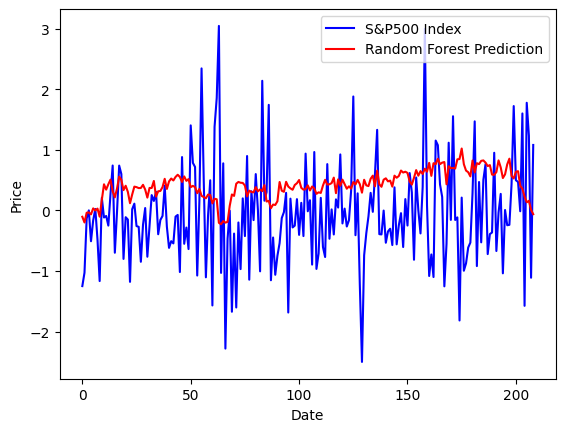

In [ ]:
# On divise les données en ensembles d'entraînement et de test

X_train = X[:index]
X_test = X[index:]
y_train = y[:index]
y_test = y[index:]

# On entraîne le modèle Random Forest avec bootstrapping
model = RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=True)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# We Compute the Root Mean Squared Error (RMSE), the Mean Absolute Error (MAE) and the Accuracy
random_forest_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
random_forest_n_rmse= random_forest_rmse / y_test.mean()
random_forest_mae = mean_absolute_error(y_test, y_pred)
# random_forest_accuray = accuracy_score(y_test, y_pred)

random_forest_metrics = {
    "RMSE" : random_forest_rmse,
    "Normalized RMSE" : random_forest_n_rmse,
    "MAE" : random_forest_mae
    # "Accuracy" : random_forest_accuray
}

print(f'RMSE: {random_forest_rmse}')
print(f'Normalized RMSE: {random_forest_n_rmse}')
print(f'Mean Absolute Error: {random_forest_mae}')
# print(f'Accuracy: {random_forest_accuray}')

plt.plot(y_test.values, 'b-')
plt.plot(y_pred, 'r-')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(["S&P500 Index", "Random Forest Prediction"])
# plt.vlines(x=index, ymin=y_test.values.min(), ymax=y_test.values.max(), color='r', linestyle='-')
plt.show()

--------------------------------------------------------------------

--------------------------------------------------------------------

# ARIMA

## Import Packages

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

## ARIMA : Model

### Spliting Data

In [ ]:
# Select the target column (time series to predict)
target_column = ('Log Returns', '^GSPC')  # Adjusted close price for S&P 500
time_series = clean_data[target_column]

# Split data into training and testing sets
train_size = int(len(time_series) * 0.8)
train_data, test_data = time_series[:train_size], time_series[train_size:]

### Getting Parameters with Auto-ARIMA

In [ ]:
# Ajustement du modèle avec auto_arima
model = auto_arima(train_data,
                   start_p=1, start_q=1,
                   max_p=12, max_q=12,
                   seasonal=True,
                   m=12,  # Périodicité saisonnière (par exemple, données mensuelles)
                   trace=True,
                   stepwise=True)

# Récupérer les ordres
order = model.order
seasonal_order = model.seasonal_order

# Afficher les paramètres optimaux
print("Ordre non-saisonnier (p, d, q) :", order)
print("Ordre saisonnier (P, D, Q, s) :", seasonal_order)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=2508.080, Time=2.49 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2503.407, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2505.705, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2505.592, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2502.436, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=2503.708, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=2503.595, Time=0.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=2505.387, Time=1.90 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2505.386, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=2505.383, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=2505.700, Time=0.89 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 7.318 seconds
Ordre non-saisonnier (p, d, q) : (0, 0, 0)
Ordre saisonnier (P, D, Q, s) : (0, 0, 0, 12)


### Model

In [ ]:
# Fit ARIMA model
# Specify the (p, d, q) parameters for ARIMA
p, d, q = 5, 1, 2  # These can be tuned further
model = ARIMA(train_data, order=order, seasonal_order=seasonal_order)
fitted_model = model.fit()

# Print model summary
print(fitted_model.summary())

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))
predictions = predictions.values.flatten()

                                  SARIMAX Results                                   
Dep. Variable:     ('Log Returns', '^GSPC')   No. Observations:                  836
Model:                                ARIMA   Log Likelihood               -1249.704
Date:                      Thu, 06 Mar 2025   AIC                           2503.407
Time:                              17:10:34   BIC                           2512.864
Sample:                                   0   HQIC                          2507.033
                                      - 836                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0379      0.038     -1.009      0.313      -0.111       0.036
sigma2         1.1640      0.042     27.727      0.000       1.082       1.246
Ljun

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

### RMSE & MAE (Evaluation)

In [ ]:
# Evaluate the model
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 0.714185725605658
Mean Absolute Error (MAE): 0.6242361975056889


### Plotting Predictions

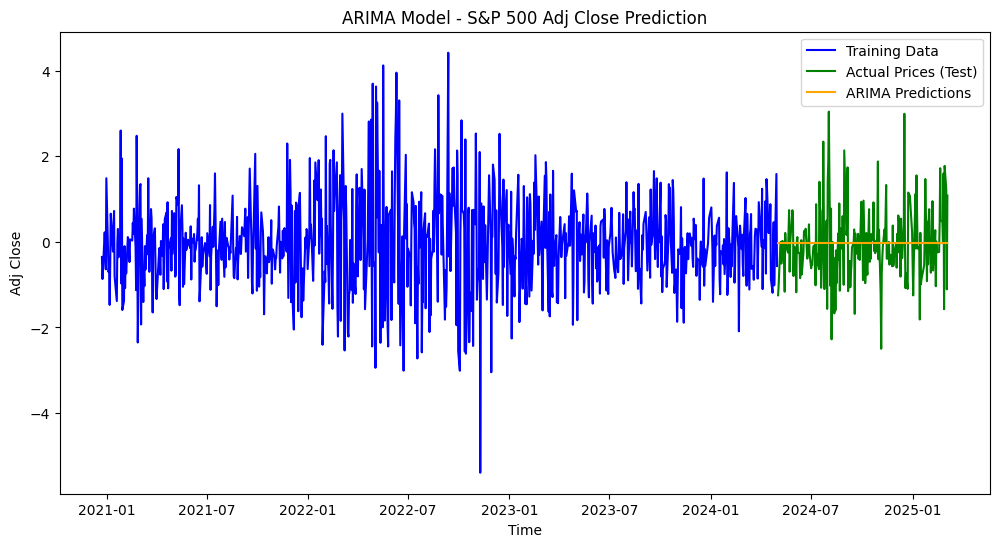

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data.index, test_data, label='Actual Prices (Test)', color='green')
plt.plot(test_data.index, predictions, label='ARIMA Predictions', color='orange')
plt.legend()
plt.title("ARIMA Model - S&P 500 Adj Close Prediction")
plt.xlabel("Time")
plt.ylabel("Adj Close")
plt.show()

--------------------------------------------------------------------

--------------------------------------------------------------------

# GRADIENT BOOSTING

## Import Packages

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

## GBoost : Model

### Data to Predict

In [ ]:
# Select features and target
gboost_asset = '^GSPC'
gboost_src = 'Close'
gboost_target = clean_data[(gboost_src, gboost_asset)] # Targeted Data
# features = clean_data.drop(columns=[('Close', asset)]).values  # Other colomns as Features
gboost_features = clean_data[
    [
        ('Open', '^GSPC'),
        ('High', '^GSPC'),
        ('Low', '^GSPC'),
        ('Close', 'DX-Y.NYB'),
        ('Close', '^IXIC'),
        ('Close', 'CL=F'),
        ('Close', 'GC=F'),
        ('^GSPC', 'SMA_20'),
        ('^GSPC', 'Upper_Band'),
        ('^GSPC', 'Lower_Band'),
    ]
]  # Other colomns as Features

# Shift target for t+1 prediction
clean_data['Target_t+1'] = gboost_target.shift(-1)

# Drop the last row since we can't predict t+1 for the last observation
clean_data = clean_data.iloc[:-1]

# Redefine features and target
gboost_X = clean_data[gboost_features.columns]  # All input features
gboost_y = clean_data['Target_t+1']  # The shifted Adj Close

### Spliting Data

In [ ]:
# Train-test split
gboost_X_train, gboost_X_test, gboost_y_train, gboost_y_test = train_test_split(gboost_X, gboost_y, test_size=0.2, random_state=42)

### Model

In [ ]:
# Initialize Gradient Boosting Regressor
gboost_model = GradientBoostingRegressor(
    n_estimators=100,       # Reduce number of trees
    max_depth=3,            # Reduce tree depth
    learning_rate=0.1,      # Adjust learning rate
    subsample=0.8,          # Use a subset of the data for training each tree
    random_state=42
)

# Train the model
gboost_model.fit(gboost_X_train, gboost_y_train)

# Make predictions
gboost_y_pred = gboost_model.predict(gboost_X_test)

### RMSE & MAE (Evaluation)

Mean Squared Error (MSE), for Train: 1019.5264104052628
Mean Absolute Error (MAE), for Train: 25.475089999317486 

Mean Squared Error (MSE), for Test: 2688.59239847289
Mean Absolute Error (MAE), for Test: 40.7548898637691 

Mean Squared Error (MSE), naive method: 952949.2058659884
Mean Absolute Error (MAE), naive method: 761.1395709698016 

MSE Ratio : MSE Prediction over MSE Train (MSER): 2.637099314969361
MAE Ratio : MAE Prediction over MAE Train (MAER): 1.5997937540107212


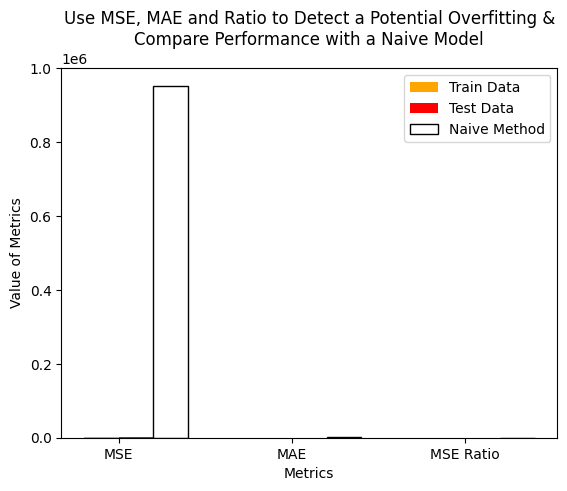

<Figure size 800x600 with 0 Axes>

In [ ]:
evaluation_rmse_mae(gboost_model, gboost_X_train, gboost_y_train, gboost_y_test, gboost_y_pred)

In [ ]:
# Evaluate the model
mse_train = mean_squared_error(gboost_y_train, gboost_model.predict(gboost_X_train))
mae_train = mean_absolute_error(gboost_y_train, gboost_model.predict(gboost_X_train))
mse_pred = mean_squared_error(gboost_y_test, gboost_y_pred)
mae_pred = mean_absolute_error(gboost_y_test, gboost_y_pred)

print(f"Mean Squared Error (MSE), for Train: {mse_train}")
print(f"Mean Absolute Error (MAE), for Train: {mae_train}")
print(f"Mean Squared Error (MSE), for Test: {mse_pred}")
print(f"Mean Absolute Error (MAE), for Test: {mae_pred}")
print(f"Mean Absolute Error Ratio (MSER): {mse_pred/mse_train}")
print(f"Mean Absolute Error Ratio (MAER): {mae_pred/mae_train}")

Mean Squared Error (MSE), for Train: 1019.5264104052628
Mean Absolute Error (MAE), for Train: 25.475089999317486
Mean Squared Error (MSE), for Test: 2688.59239847289
Mean Absolute Error (MAE), for Test: 40.7548898637691
Mean Absolute Error Ratio (MSER): 2.637099314969361
Mean Absolute Error Ratio (MAER): 1.5997937540107212


### Plotting Results

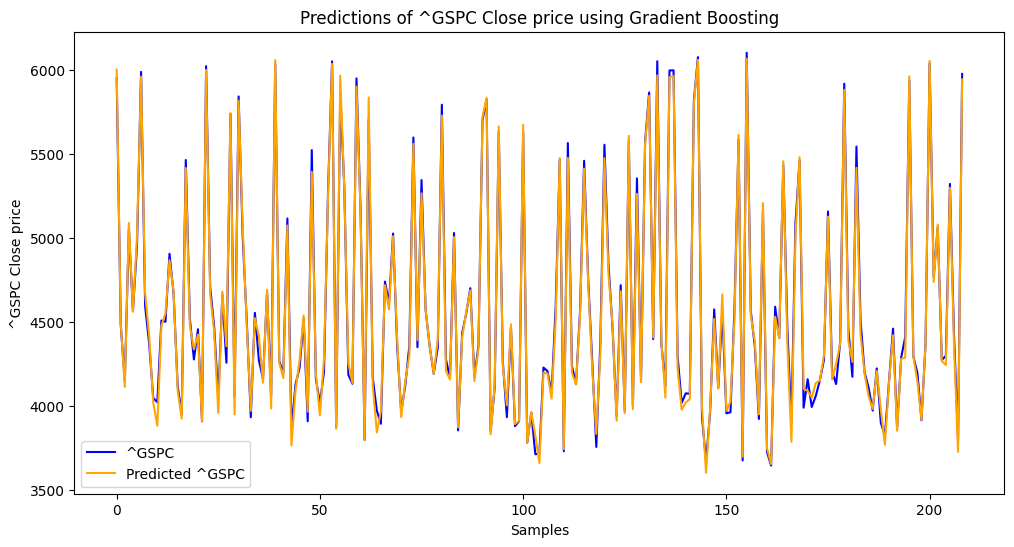

In [ ]:
# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(gboost_y_test.values, label=f'{gboost_asset}', color='blue')
plt.plot(gboost_y_pred, label=f"Predicted {gboost_asset}", color='orange')
plt.legend()
plt.title(f'Predictions of {gboost_asset} {gboost_src} price using Gradient Boosting')
plt.xlabel("Samples")
plt.ylabel(f"{gboost_asset} {gboost_src} price")
plt.show()

## GBoost : Cross-Validation

In [ ]:
# Define the custom scoring function (MSE)
mse_scorer = make_scorer(mean_squared_error)

# Perform 5-fold cross-validation for MSE
cv_scores = cross_val_score(gboost_model, gboost_X, gboost_y, cv=10, scoring=mse_scorer)

# Print the cross-validation results
print(f"Cross-Validation MSE Scores: {cv_scores}")
print(f"Average CV MSE: {cv_scores.mean()}")
print(f"Standard Deviation of CV MSE: {cv_scores.std()}")

# Cross-validation predictions
y_cv_pred = cross_val_predict(gboost_model, gboost_X, gboost_y, cv=10)

Cross-Validation MSE Scores: [25194.85863333  5265.46360782  5975.16600687  6018.671067
  5841.9767522   1834.86713329  1489.45765034  9973.70704741
  9032.86345229 83906.61270099]
Average CV MSE: 15453.364405152906
Standard Deviation of CV MSE: 23680.09570848196


**Interpretation of the Results :**

- Cross-Validation MSE Scores: The MSE values for the folds vary widely, from very low error to relatively high error. This variability suggests that the model's performance depends on the specific data in each fold.
- Average CV MSE: 0.0066815061 is relatively low, which indicates that, on average, the model performs well.
- Standard Deviation of CV MSE: 0.0122432188 is quite large compared to the average MSE, suggesting inconsistency in performance across the folds.

\

**The model performs well on average**, but its performance can be highly variable depending on the data it encounters. This might indicate:
- Sensitivity to certain data patterns: The model might struggle to generalize for specific subsets of the data.
- Potential overfitting: If the variability is due to noise in the dataset or spurious correlations.

## GBoost : Residuals

### Distribution and Scatter Plot

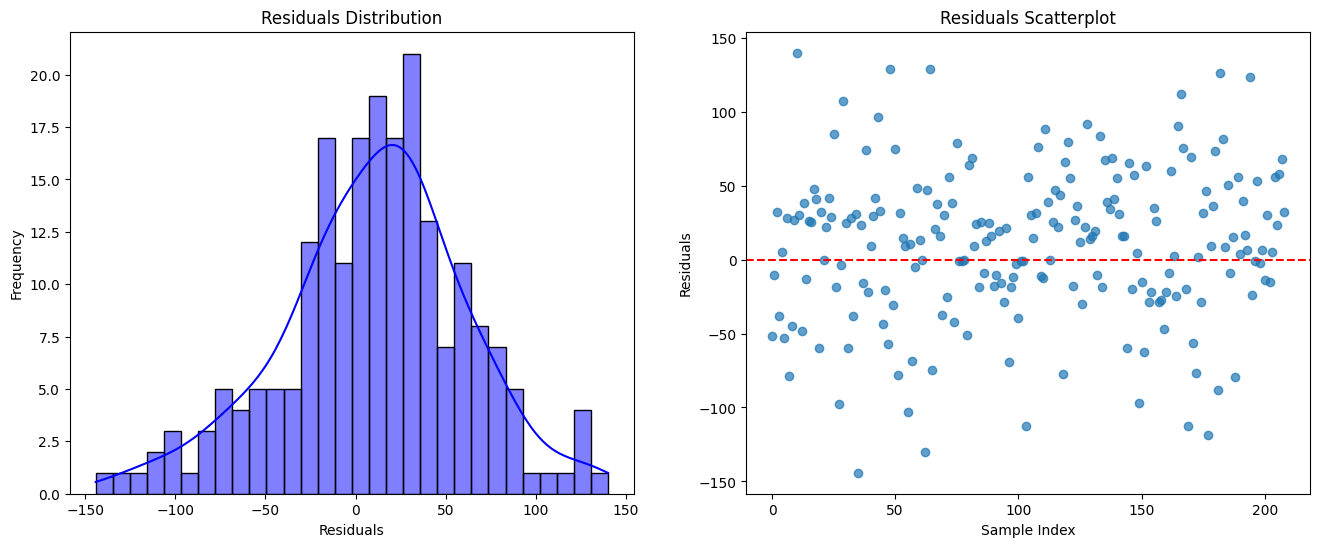

Mean of residuals: 10.03752307176001
Standard deviation of residuals: 50.870821981335965


In [ ]:
# Calculate residuals
gboost_residuals = gboost_y_test - gboost_y_pred

# Size of Graphs
plt.figure(figsize=(16, 6))

# Residuals distribution
plt.subplot(1, 2, 1)
sns.histplot(gboost_residuals, kde=True, bins=30, color="blue")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Residuals scatterplot
plt.subplot(1, 2, 2)
plt.scatter(range(len(gboost_residuals)), gboost_residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals Scatterplot")
plt.xlabel("Sample Index")
plt.ylabel("Residuals")

plt.show()

# Normality check
print("Mean of residuals:", np.mean(gboost_residuals))
print("Standard deviation of residuals:", np.std(gboost_residuals))

### QQ-Plot

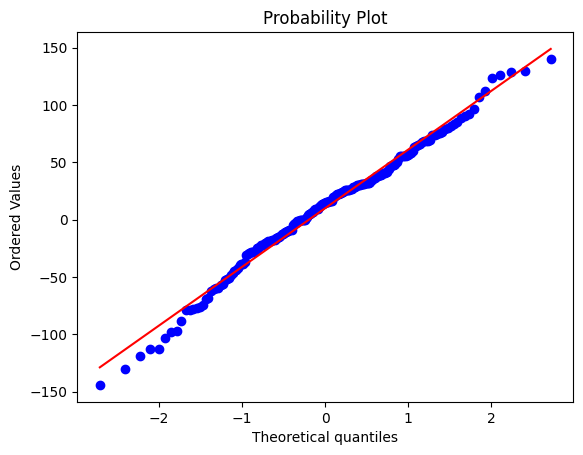

In [ ]:
stats.probplot(gboost_residuals, dist="norm", plot=pylab)
pylab.show()

Key Observations 👀:
- Residuals Centered at 0: This is a good sign, indicating that, on average, the model does not systematically underpredict or overpredict
- KDE Distribution (Gaussian-like): Residuals approximately follow a normal distribution, which supports the assumption that errors are random and independent

Scatterplot of Residuals ♻:
- No clear pattern: Residuals appear randomly distributed around 0
- No heteroscedasticity: Variance in residuals does not systematically increase or decrease with the predicted values

--------------------------------------------------------------------

--------------------------------------------------------------------

# XGBOOST

## Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

## XGBoost : Model

### Data to Predict

In [ ]:
# Création des caractéristiques temporelles
clean_data['Day'] = clean_data.index.day
clean_data['DayOfWeek'] = clean_data.index.dayofweek
clean_data['EndOfYear'] = clean_data.index.is_year_end

date_data = clean_data.index

# Définition de X et y
X = clean_data.drop(columns=['Log Returns', '^GSPC'])  # Variables explicatives
y = clean_data['Log Returns', '^GSPC']  # Variable cible

### Spliting Data

<ipython-input-145-7d54877e534a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Day'] = clean_data.index.day
<ipython-input-145-7d54877e534a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['DayOfWeek'] = clean_data.index.dayofweek
<ipython-input-145-7d54877e534a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

MSE: 1.3845529798436822
RMSE: 1.176670293601263
Normalized RMSE: -16.546007560220875
MAE: 1.0115223381999503


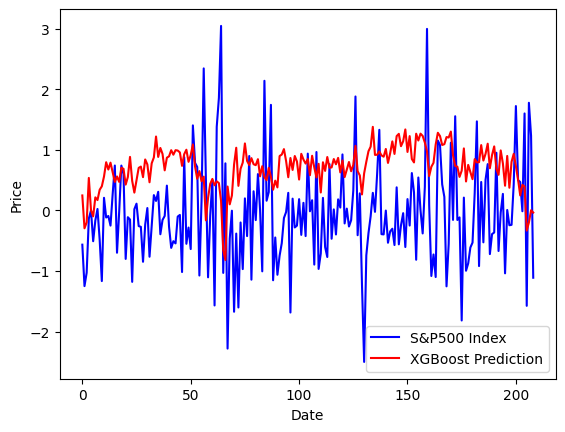

In [ ]:
# Division des données (80% entraînement, 20% test)
index = int(len(clean_data) * 0.8)
X_train, X_test = X[:index], X[index:]
y_train, y_test = y[:index], y[index:]

### Model

In [ ]:
# Entraînement du modèle XGBoost
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)

# Prédictions
y_pred_xgb = model_xgb.predict(X_test)

### RMSE & MEA (Evaluation)

In [ ]:
# Évaluation du modèle
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_n_rmse = xgb_rmse / y_test.mean()
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)

xgb_metrics = {
     "MSE": xgb_mse,
    "RMSE": xgb_rmse,
    "Normalized RMSE": xgb_n_rmse,
    "MAE": xgb_mae
}

### Plotting Results

In [ ]:
# Affichage des résultats
print(f'MSE: {xgb_mse}')
print(f'RMSE: {xgb_rmse}')
print(f'Normalized RMSE: {xgb_n_rmse}')
print(f'MAE: {xgb_mae}')

# Visualisation des résultats
plt.plot(y_test.values, 'b-', label="S&P500 Index")
plt.plot(y_pred_xgb, 'r-', label="XGBoost Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

--------------------------------------------------------------------

--------------------------------------------------------------------

# RESEAU DE NEURONES

## Import Packages

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Réseau de Neurones : modèle

### Data to predict

In [ ]:
date_data = clean_data.index

# Définition de X et y
X = clean_data.drop(columns=['Log Returns', '^GSPC'])  # Variables explicatives
y = clean_data['Log Returns', '^GSPC']  # Variable cible

# Suppression des lignes avec des NaN
X = X.dropna()
y = y.loc[X.index]  # On garde les mêmes index

# Standardisation des données (important pour les réseaux de neurones)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Spliting Data

In [ ]:
# Division des données (80% entraînement, 20% test)
index = int(len(X) * 0.8)
X_train, X_test = X_scaled[:index], X_scaled[index:]
y_train, y_test = y[:index], y[index:]

### Model

Epoch 1/50


<ipython-input-51-1c17270ed9a8>:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = clean_data.drop(columns=['Log Returns', '^GSPC'])  # Variables explicatives
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.8555 - mae: 1.0376 - val_loss: 1.2304 - val_mae: 0.9168
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3817 - mae: 0.8742 - val_loss: 1.5003 - val_mae: 1.0369
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3445 - mae: 0.8674 - val_loss: 0.8909 - val_mae: 0.7447
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0966 - mae: 0.7998 - val_loss: 1.0122 - val_mae: 0.8174
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1589 - mae: 0.8006 - val_loss: 1.2671 - val_mae: 0.9310
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0320 - mae: 0.7700 - val_loss: 1.1244 - val_mae: 0.8670
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1708 - mae: 0.8028 - val_loss: 1.3749 - val_mae: 0.9896
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1439 - mae: 0.8068 - val_loss: 1.1669 - val_mae: 0.8901
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1200 - mae: 0.7833 - v

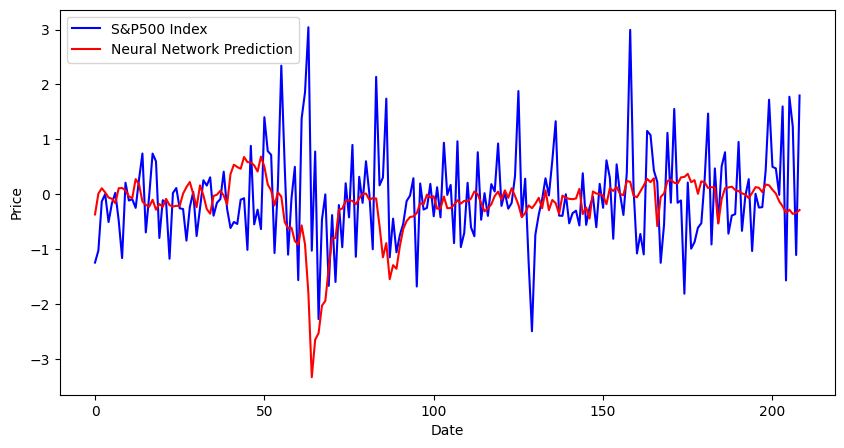

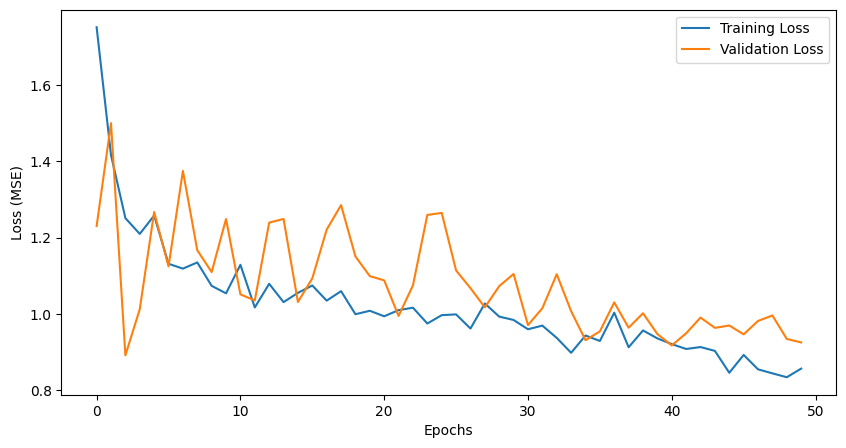

In [51]:
# Construction du réseau de neurones
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Couche cachée 1
    Dropout(0.2),  # Dropout pour éviter l'overfitting
    Dense(32, activation='relu'),  # Couche cachée 2
    Dropout(0.2),
    Dense(1, activation='linear')  # Sortie linéaire pour une régression
])

# Compilation du modèle
model_nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entraînement du modèle
history = model_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Prédictions
y_pred_nn = model_nn.predict(X_test).flatten()

### RMSE & MAE (Evaluation)

In [ ]:
#  Évaluation du modèle
nn_mse = mean_squared_error(y_test, y_pred_nn)
nn_rmse = np.sqrt(nn_mse)
nn_n_rmse = nn_rmse / y_test.mean()
nn_mae = mean_absolute_error(y_test, y_pred_nn)

nn_metrics = {
    "MSE": nn_mse,
    "RMSE": nn_rmse,
    "Normalized RMSE": nn_n_rmse,
    "MAE": nn_mae
}

### Ploting Results

In [ ]:
# Affichage des résultats
print(f'MSE: {nn_mse}')
print(f'RMSE: {nn_rmse}')
print(f'Normalized RMSE: {nn_n_rmse}')
print(f'MAE: {nn_mae}')

# Visualisation des résultats
plt.figure(figsize=(10,5))
plt.plot(y_test.values, 'b-', label="S&P500 Index")
plt.plot(y_pred_nn, 'r-', label="Neural Network Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

#courbe d'apprentissage
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

--------------------------------------------------------------------

--------------------------------------------------------------------

# LSTM

## Import Packages

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.wrappers.scikit_learn import KerasRegressor

## LSTM Model

### Hyper-Parameters

In [ ]:
lstm_hyper_parameters = {
    'neurons' : 200,
    'dense' : 25,
    'dropout' : 0.8*0
}

### Activation, Optimizer, Loss, Metrics

- Activation : [https://www.tensorflow.org/api_docs/python/tf/keras/activations]

- Optimizer : [https://www.tensorflow.org/api_docs/python/tf/keras/optimizers]

- Losses : [https://www.tensorflow.org/api_docs/python/tf/keras/losses]

In [ ]:
# Activation Function : 'deserialize', 'elu', 'exponential', 'gelu', 'get', 'hard_sigmoid', 'hard_silu', 'hard_swish', 'leaky_relu', 'linear', 'log_softmax', 'mish', 'relu', 'relu6', 'selu', 'serialize', 'sigmoid', 'silu', 'softmax', 'softplus', 'softsign','swish', 'tanh'
lstm_activation_function = 'relu'

# Optimizer Function for the Gradient Descent : 'Adadelta', 'Adafactor', 'Adagrad', 'Adam', 'AdamW', 'Adamax', 'Ftrl', 'Lion', 'LossScaleOptimizer', 'Nadam', 'optimizer_function', 'RMSprop', 'SGD'
lstm_optimizer_function = 'adam'

# Loss Function : 'BinaryCrossentropy', 'BinaryFocalCrossentropy', 'CTC' ,'CategoricalCrossentropy', 'CategoricalFocalCrossentropy' ,'CategoricalHinge', 'CosineSimilarity', 'Dice', 'Hinge',' Huber', 'KLDivergence', 'LogCosh','Loss', 'MeanAbsoluteError', 'MeanAbsolutePercentageError', 'MeanSquaredError', 'MeanSquaredLogarithmicError', 'Poisson', 'Reduction' ,'SparseCategoricalCrossentropy', 'SquaredHinge', 'Tversky'
lstm_loss_function = 'MeanAbsoluteError'

# Metric Function : 'accuray'
lstm_metrics_function = ['accuracy']

### Sequences & Spliting Data

In [ ]:
# Data we want to predict
lstm_asset = '^GSPC'
lstm_src ='Close'
lstm_target_data = clean_data[(lstm_src, lstm_asset)].values  # Targeted Data
# features = clean_data.drop(columns=[('Log Returns', '^GSPC')]).values  # Other colomns as Features
lstm_features = clean_data[
    [
        ('Open', '^GSPC'),
        ('High', '^GSPC'),
        ('Low', '^GSPC'),
        ('Close', 'DX-Y.NYB'),
        ('Close', '^IXIC'),
        ('Close', 'CL=F'),
        ('Close', 'GC=F'),
        ('^GSPC', 'SMA_20'),
        ('^GSPC', 'Upper_Band'),
        ('^GSPC', 'Lower_Band'),
    ]
].values  # Other colomns as Features

# Data Normalization
lstm_scaler = MinMaxScaler(feature_range=(0, 1))
lstm_scaled_data = lstm_scaler.fit_transform(np.hstack((lstm_target_data.reshape(-1, 1), lstm_features)))

# Function to create sequences with lag of the ADF Test & ACF Function
def create_sequences(data, target, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i])  # Sequences with `lag` : [t - lag; t]
        y.append(target[i])  # Present Value (t+1)
    return np.array(X), np.array(y)

# Creation of Sequences
lag = 100
lstm_X, lstm_y = create_sequences(lstm_scaled_data[:, 1:], lstm_scaled_data[:, 0], lag)

# Data Split into Train & Test Data
lstm_X_train, lstm_X_test, lstm_y_train, lstm_y_test = train_test_split(lstm_X, lstm_y, test_size=0.2, random_state=42)

# Data Dimensions
print("Dimensions de X_train :", lstm_X_train.shape)  # (samples, lag, features)

Dimensions de X_train : (756, 100, 10)


### Model Training

In [ ]:
# Creation of LSTM model
lstm_model = Sequential([
    LSTM(
        lstm_hyper_parameters['neurons'],
        return_sequences=True,
        input_shape=(lstm_X_train.shape[1], lstm_X_train.shape[2])
    ),

    Dropout(lstm_hyper_parameters['dropout']),

    LSTM(
        lstm_hyper_parameters['neurons'],
        return_sequences=False
    ),

    Dropout(lstm_hyper_parameters['dropout']),
    Dense(lstm_hyper_parameters['dense'], activation=lstm_activation_function),
    Dense(1)  # One output (Log Returns)
])

# Compilation
lstm_model.compile(optimizer=lstm_optimizer_function, loss=lstm_loss_function)

# Train
history = lstm_model.fit(
    lstm_X_train,
    lstm_y_train,
    batch_size=32,
    epochs=20,
    validation_data=(lstm_X_test, lstm_y_test),
    verbose=1
)

# Predictions
lstm_y_pred = lstm_model.predict(lstm_X_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 482ms/step - loss: 0.1481 - val_loss: 0.0498
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 507ms/step - loss: 0.0493 - val_loss: 0.0312
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 453ms/step - loss: 0.0306 - val_loss: 0.0340
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 445ms/step - loss: 0.0357 - val_loss: 0.0302
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 446ms/step - loss: 0.0280 - val_loss: 0.0378
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - loss: 0.0285 - val_loss: 0.0246
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 511ms/step - loss: 0.0241 - val_loss: 0.0288
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 423ms/step - loss: 0.0260 - val_loss: 0.0228
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 406ms/step - loss: 0.0230 - val_loss: 0.0219
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 463ms/step - loss: 0.0224 - val_loss: 0.0207
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 441ms/step - loss: 0.0244 - val_loss: 0.0211
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 21

In [ ]:
#courbe d'apprentissage
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

### Hyper-Parameters Optimization

In [ ]:
# Define your model function that returns a compiled model
def create_lstm_model(neurons=50, dropout=0.2, dense=1, activation='relu', optimizer='adam', loss='mean_squared_error'):
    model = Sequential([
        LSTM(neurons, return_sequences=True, input_shape=(lstm_X_train.shape[1], lstm_X_train.shape[2])),
        Dropout(dropout),
        LSTM(neurons, return_sequences=False),
        Dropout(dropout),
        Dense(dense, activation=activation),
        Dense(1)  # Output layer
    ])

    model.compile(optimizer=optimizer, loss=loss)
    return model

# Wrap the model using KerasRegressor (or KerasClassifier if classification)
lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)

In [ ]:
param_grid = {
    'neurons': [50, 100],  # Number of neurons in the LSTM layers
    'dropout': [0.2, 0.3],  # Dropout rate
    'dense': [1, 2],  # Number of units in the dense layer
    'activation': ['relu', 'tanh'],  # Activation function
    'optimizer': ['adam', 'rmsprop'],  # Optimizer
    'batch_size': [16, 32],  # Batch size
    'epochs': [10, 20]  # Number of epochs
}

In [ ]:
grid_search = GridSearchCV(estimator=lstm_model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_search.fit(lstm_X_train, lstm_y_train)

### Denormalization of Data

In [ ]:
# # Inverse normalization
# y_pred = scaler.inverse_transform(
#     np.hstack(
#         (
#             y_pred,
#             np.zeros(
#                 (y_pred.shape[0],
#                  scaled_data.shape[1] - 1)
#             )
#         )
#     )
# )[:, 0]

# y_test_rescaled = scaler.inverse_transform(
#     np.hstack(
#         (
#             y_test.reshape(-1, 1),
#             np.zeros(
#                 (
#                     y_test.shape[0],
#                     scaled_data.shape[1] - 1)
#             )
#         )
#     )
# )[:, 0]

### RSME & MAE (Evaluation)

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step
Mean Squared Error (MSE), for Train: 0.0005369767504455192
Mean Absolute Error (MAE), for Train: 0.01723621360372042 

Mean Squared Error (MSE), for Test: 0.0005405689323282178
Mean Absolute Error (MAE), for Test: 0.017722567257055434 

Mean Squared Error (MSE), naive method: 0.13654043599769283
Mean Absolute Error (MAE), naive method: 0.27949620804479297 

MSE Ratio : MSE Prediction over MSE Train (MSER): 1.0066896413666295
MAE Ratio : MAE Prediction over MAE Train (MAER): 1.0282169660063876


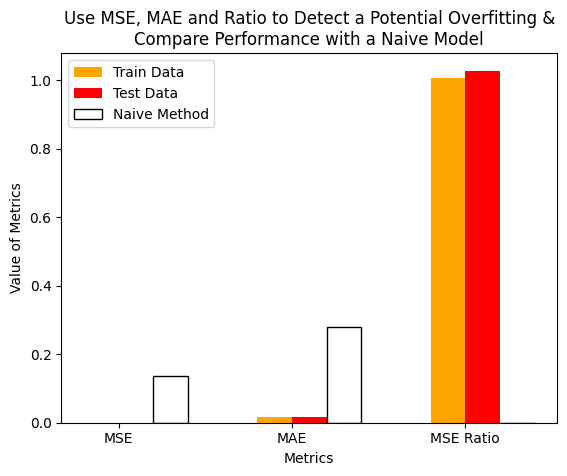

<Figure size 800x600 with 0 Axes>

In [ ]:
evaluation_rmse_mae(lstm_model, lstm_X_train, lstm_y_train, lstm_y_test, lstm_y_pred)

### Ploting Predictions

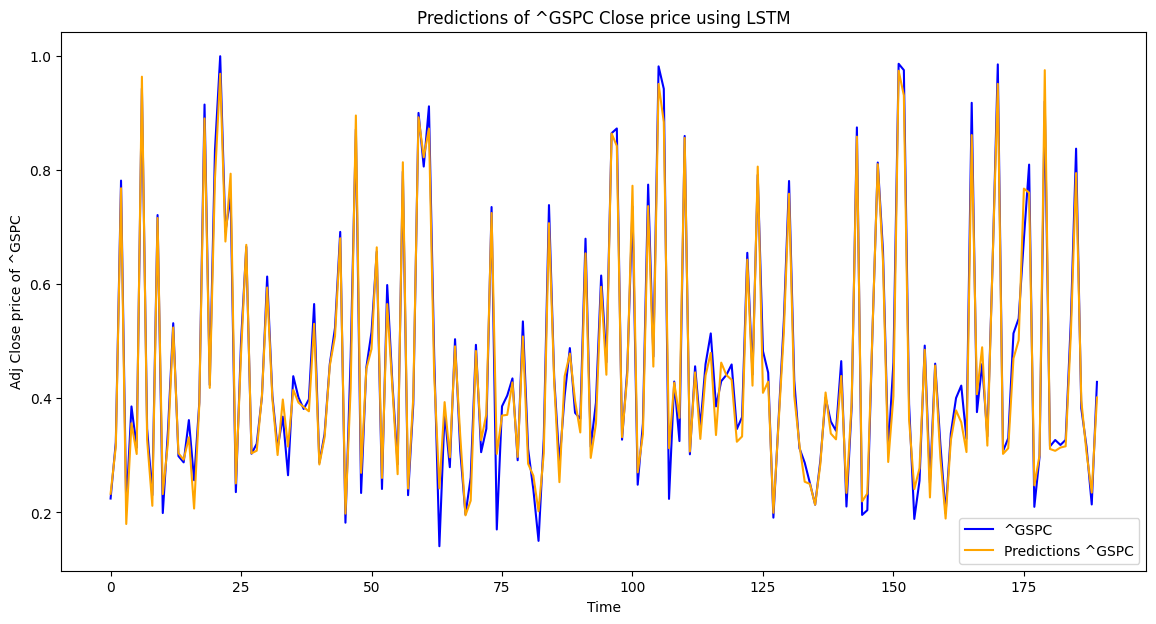

In [ ]:
# Visualization of predictions vs Log Returns
plt.figure(figsize=(14, 7))
plt.plot(lstm_y_test, label=f'{lstm_asset}', color='blue')
plt.plot(lstm_y_pred, label=f'Predictions {lstm_asset}', color='orange')
plt.title(f'Predictions of {lstm_asset} {lstm_src} price using LSTM')
plt.xlabel('Time')
plt.ylabel(f'{src} price of {lstm_asset}')
plt.legend()
plt.show()

## LSTM : Cross-Validation

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []

# Define the model function
def build_model():

  lstm_model = Sequential([
  LSTM(
      lstm_hyper_parameters['neurons'],
      return_sequences=True,
      input_shape=(lstm_X_train.shape[1], lstm_X_train.shape[2])
  ),

  Dropout(lstm_hyper_parameters['dropout']),

  LSTM(
      lstm_hyper_parameters['neurons'],
      return_sequences=False
  ),

  Dropout(lstm_hyper_parameters['dropout']),
  Dense(lstm_hyper_parameters['dense'], activation=lstm_activation_function),
  Dense(1)  # One output (Log Returns)
  ])

  # Compilation
  lstm_model.compile(optimizer=lstm_optimizer_function, loss=lstm_loss_function)

  return lstm_model

for train_index, test_index in kf.split(lstm_X):
    lstm_X_train, lstm_X_test = lstm_X[train_index], lstm_X[test_index]
    lstm_y_train, lstm_y_test = lstm_y[train_index], lstm_y[test_index]

    # Build and train the model
    lstm_model = build_model()
    lstm_model.fit(lstm_X_train, lstm_y_train, epochs=10, batch_size=32, verbose=0)

    # Predict and calculate MSE
    lstm_y_pred = lstm_model.predict(lstm_X_test)
    mse = mean_squared_error(lstm_y_test, lstm_y_pred)
    mse_scores.append(mse)

# Print results
print(f"Cross-Validation MSE Scores: {mse_scores}")
print(f"Average CV MSE: {np.mean(mse_scores)}")
print(f"Standard Deviation of CV MSE: {np.std(mse_scores)}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
Cross-Validation MSE Scores: [0.005722862224215539, 0.0016105624350655084, 0.28444002661822754, 0.0021958496714746785, 0.28385324033754195]
Average CV MSE: 0.11556450825730505
Standard Deviation of CV MSE: 0.13765404445065246


## LSTM : Residuals

### Distribution and Scatter Plot

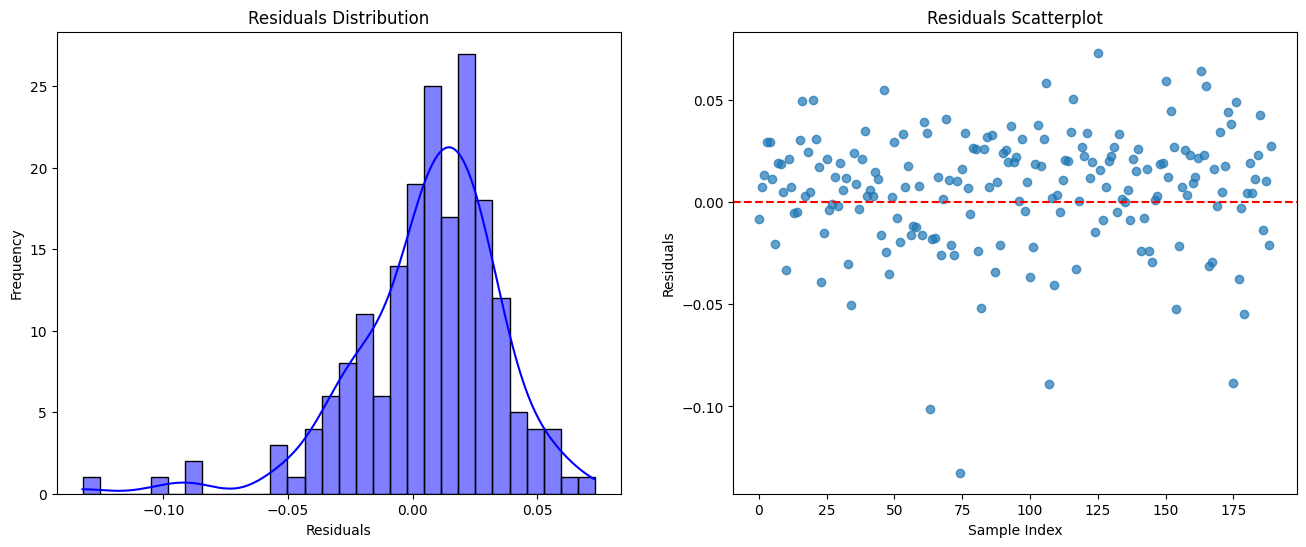

Mean of residuals: 0.006308051183090521
Standard deviation of residuals: 0.028880689232241605


In [ ]:
# Calculate residuals
lstm_y_pred = lstm_y_pred.flatten()  # Converts (209, 1) to (209,)
lstm_residuals = lstm_y_test - lstm_y_pred

# Size of Graphs
plt.figure(figsize=(16, 6))

# Residuals distribution
plt.subplot(1, 2, 1)
sns.histplot(lstm_residuals, kde=True, bins=30, color="blue")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Residuals scatterplot
plt.subplot(1, 2, 2)
plt.scatter(range(len(lstm_residuals)), lstm_residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals Scatterplot")
plt.xlabel("Sample Index")
plt.ylabel("Residuals")

plt.show()

# Normality check
print("Mean of residuals:", np.mean(lstm_residuals))
print("Standard deviation of residuals:", np.std(lstm_residuals))

### QQ-Plot

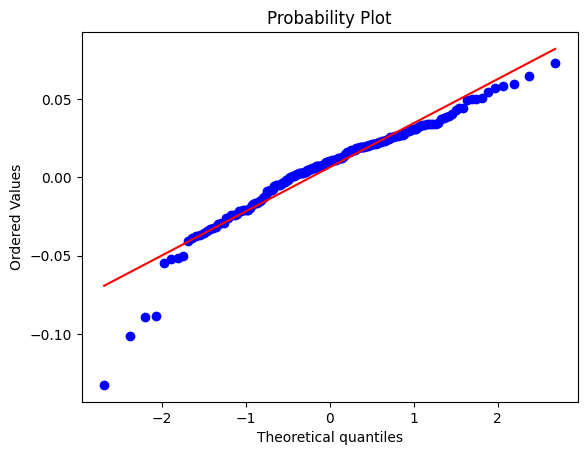

In [ ]:
stats.probplot(lstm_residuals, dist="norm", plot=pylab)
pylab.show()

## LSTM : Some other Overfiting Tests

### Asset for Test

In [ ]:
# Data we want to predict
asset = 'BLK' # TESLA
asset_src = 'Adj Close'
targeted_data = clean_data[(asset_src, asset)].values  # Targeted Data
# features = clean_data.drop(columns=[('Close', '^TNX')]).values  # Other colomns as Features
features = clean_data[
    [
        ('Open', asset),
        ('High', asset),
        ('Low', asset),
        ('Adj Close', 'DX-Y.NYB'),
        ('Adj Close', '^IXIC'),
        ('Adj Close', 'CL=F'),
        ('Adj Close', 'GC=F'),
        (asset, 'SMA_20'),
        (asset, 'Upper_Band'),
        (asset, 'Lower_Band'),
    ]
].values  # Other colomns as Features

# Data Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.hstack((targeted_data.reshape(-1, 1), features)))

# Function to create sequences with lag of the ADF Test & ACF Function
def create_sequences(data, target, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i])  # Sequences with `lag` : [t - lag; t]
        y.append(target[i])  # Present Value (t+1)
    return np.array(X), np.array(y)

# Creation of Sequences
lag = 100
X_asset, y_asset = create_sequences(scaled_data[:, 1:], scaled_data[:, 0], lag)

y_pred_asset = lstm_model.predict(X_asset)

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


### Reference Asset (S&P500)

In [ ]:
# Data we want to predict
ref_asset = '^GSPC'
ref_src = 'Adj Close'
targeted_data = clean_data[(ref_src, ref_asset)].values  # Targeted Data
# features = clean_data.drop(columns=[('Close', '^GSPC')]).values  # Other colomns as Features
features = clean_data[
    [
        ('Open', ref_asset),
        ('High', ref_asset),
        ('Low', ref_asset),
        ('Adj Close', 'DX-Y.NYB'),
        ('Adj Close', '^IXIC'),
        ('Adj Close', 'CL=F'),
        ('Adj Close', 'GC=F'),
        (ref_asset, 'SMA_20'),
        (ref_asset, 'Upper_Band'),
        (ref_asset, 'Lower_Band'),
    ]
].values  # Other colomns as Features

# Data Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.hstack((targeted_data.reshape(-1, 1), features)))

# Function to create sequences with lag of the ADF Test & ACF Function
def create_sequences(data, target, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i])  # Sequences with `lag` : [t - lag; t]
        y.append(target[i])  # Present Value (t+1)
    return np.array(X), np.array(y)

# Creation of Sequences
lag = 100
X_ref, y_ref = create_sequences(scaled_data[:, 1:], scaled_data[:, 0], lag)

y_pred_ref = lstm_model.predict(X_ref)

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step


### Ploting results

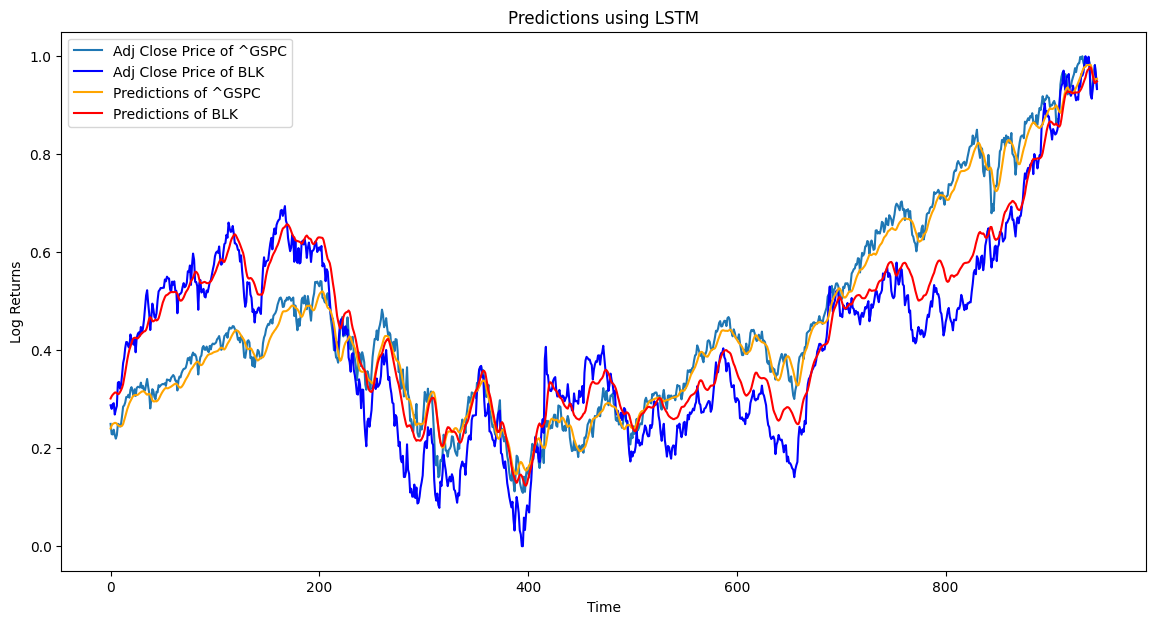

In [ ]:
# Visualization of predictions vs Log Returns
plt.figure(figsize=(14, 7))
plt.plot(y_ref, label=f'{ref_src} Price of {ref_asset}')
plt.plot(y_asset, label=f'{asset_src} Price of {asset}', color='blue')
plt.plot(y_pred_ref, label=f'Predictions of {ref_asset}', color='orange')
plt.plot(y_pred_asset, label=f'Predictions of {asset}', color='red')
plt.title('Predictions using LSTM')
plt.xlabel('Time')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

2 possible cases :

- The 2 predictions look the same. In that case, as assets should differents, it means the model overfited during the training : he learnt every price and entry does not change the output price

- The 2 predictions are VERY different (chose an asset and a reference asset whose prices do not look similar). In that case, the model did not learn every price during trainin and is able to adapt depending on inputs

--------------------------------------------------------------------

--------------------------------------------------------------------

# GRU

## Import Packages

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error

## GRU Model

### Hyper-Parameters

In [ ]:
gru_hyper_parameters = {
    'neurons' : 50,
    'dropout' : 0.8*0
}

### Activation, Optimizer, Loss, Metrics

- Activation : [https://www.tensorflow.org/api_docs/python/tf/keras/activations]

- Optimizer : [https://www.tensorflow.org/api_docs/python/tf/keras/optimizers]

- Losses : [https://www.tensorflow.org/api_docs/python/tf/keras/losses]

In [ ]:
# Activation Function : 'deserialize', 'elu', 'exponential', 'gelu', 'get', 'hard_sigmoid', 'hard_silu', 'hard_swish', 'leaky_relu', 'linear', 'log_softmax', 'mish', 'relu', 'relu6', 'selu', 'serialize', 'sigmoid', 'silu', 'softmax', 'softplus', 'softsign','swish', 'tanh'
gru_activation_function = 'relu'

# Optimizer Function for the Gradient Descent : 'Adadelta', 'Adafactor', 'Adagrad', 'Adam', 'AdamW', 'Adamax', 'Ftrl', 'Lion', 'LossScaleOptimizer', 'Nadam', 'optimizer_function', 'RMSprop', 'SGD'
gru_optimizer_function = 'adam'

# Loss Function : 'BinaryCrossentropy', 'BinaryFocalCrossentropy', 'CTC' ,'CategoricalCrossentropy', 'CategoricalFocalCrossentropy' ,'CategoricalHinge', 'CosineSimilarity', 'Dice', 'Hinge',' Huber', 'KLDivergence', 'LogCosh','Loss', 'MeanAbsoluteError', 'MeanAbsolutePercentageError', 'MeanSquaredError', 'MeanSquaredLogarithmicError', 'Poisson', 'Reduction' ,'SparseCategoricalCrossentropy', 'SquaredHinge', 'Tversky'
gru_loss_function = 'MeanAbsoluteError'

# Metric Function : 'accuray'
gru_metrics_function = ['accuracy']

### Sequences & Spliting Data

In [ ]:
# Data we want to predict
gru_asset = '^GSPC'
gru_src ='Close'
gru_target_data = clean_data[(gru_src, gru_asset)].values  # Targeted Data

# Define features similar to your LSTM model
gru_features = clean_data[
    [
        ('Open', '^GSPC'),
        ('High', '^GSPC'),
        ('Low', '^GSPC'),
        ('Close', 'DX-Y.NYB'),
        ('Close', '^IXIC'),
        ('Close', 'CL=F'),
        ('Close', 'GC=F'),
        ('^GSPC', 'SMA_20'),
        ('^GSPC', 'Upper_Band'),
        ('^GSPC', 'Lower_Band'),
    ]
].values  # Other columns as Features

# Data Normalization
gru_scaler = MinMaxScaler(feature_range=(0, 1))
gru_scaled_data = gru_scaler.fit_transform(np.hstack((gru_target_data.reshape(-1, 1), gru_features)))

# Function to create sequences with lag
def create_sequences(data, target, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i])  # Sequences with `lag` : [t - lag; t]
        y.append(target[i])  # Present Value (t+1)
    return np.array(X), np.array(y)

# Creation of Sequences
lag = 100
gru_X, gru_y = create_sequences(gru_scaled_data[:, 1:], gru_scaled_data[:, 0], lag)

# Data Split into Train & Test Data
gru_X_train, gru_X_test, gru_y_train, gru_y_test = train_test_split(gru_X, gru_y, test_size=0.2, random_state=42)

# Data Dimensions
print("Dimensions de X_train :", gru_X_train.shape)  # (samples, lag, features)

Dimensions de X_train : (756, 100, 10)


### Model Training

In [ ]:
# Creation of GRU model
gru_model = Sequential([
    GRU(
        gru_hyper_parameters['neurons'],
        return_sequences=True,
        input_shape=(gru_X_train.shape[1], gru_X_train.shape[2])
    ),

    Dropout(gru_hyper_parameters['dropout']),

    GRU(
        gru_hyper_parameters['neurons'],
        return_sequences=False
    ),

    Dropout(gru_hyper_parameters['dropout']),
    Dense(lstm_hyper_parameters['dense'], activation=gru_activation_function),
    Dense(1)  # One output (Price)
])

# Compilation
gru_model.compile(optimizer=gru_optimizer_function, loss=gru_loss_function)

# Train
history = gru_model.fit(
    gru_X_train,
    gru_y_train,
    batch_size=32,
    epochs=20,
    validation_data=(gru_X_test, gru_y_test),
    verbose=1
)

# Predictions
gru_y_pred = gru_model.predict(gru_X_test)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 190ms/step - loss: 0.1377 - val_loss: 0.0347
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.0360 - val_loss: 0.0325
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0277 - val_loss: 0.0303
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0278 - val_loss: 0.0262
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 0.0220 - val_loss: 0.0263
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.0213 - val_loss: 0.0204
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.0202 - val_loss: 0.0207
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - loss: 0.0176 - val_loss: 0.0190
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.0185 - val_loss: 0.0190
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0182 - val_loss: 0.0183
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - loss: 0.0188 - val_loss: 0.0207
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step

### RSME & MAE (Evaluation)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Mean Squared Error (MSE), for Train: 0.000372855365715801
Mean Absolute Error (MAE), for Train: 0.014703764382458281 

Mean Squared Error (MSE), for Test: 0.00046541813418110486
Mean Absolute Error (MAE), for Test: 0.01602661909122613 

Mean Squared Error (MSE), naive methode: 0.11792063369874368
Mean Absolute Error (MAE), naive methode: 0.25640294075838177 

MSE Ratio : MSE Prediction over MSE Train (MSER): 1.2482538189777785
MAE Ratio : MAE Prediction over MAE Train (MAER): 1.0899670774339953


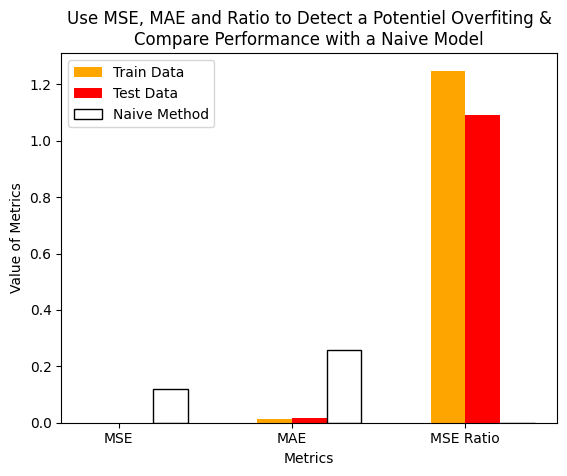

<Figure size 800x600 with 0 Axes>

In [ ]:
evaluation_rmse_mae(gru_model, gru_X_train, gru_y_train, gru_y_test, gru_y_pred)

### Ploting Predictions

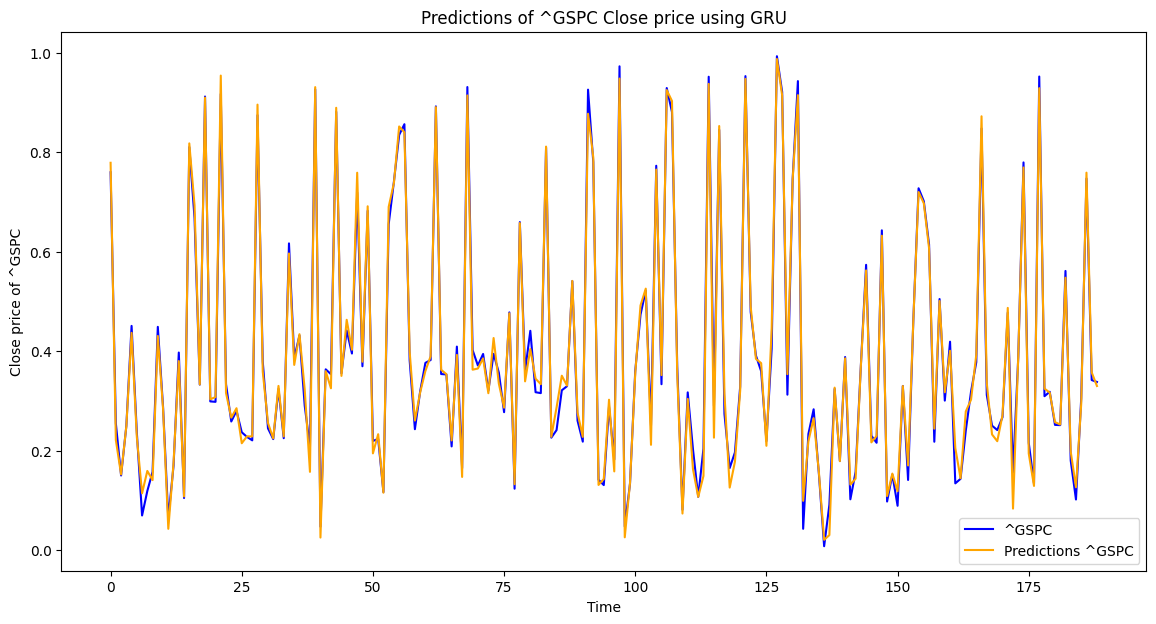

In [ ]:
# Visualization of predictions vs Log Returns
plt.figure(figsize=(14, 7))
plt.plot(gru_y_test, label=f'{gru_asset}', color='blue')
plt.plot(gru_y_pred, label=f'Predictions {gru_asset}', color='orange')
plt.title(f'Predictions of {gru_asset} {gru_src} price using GRU')
plt.xlabel('Time')
plt.ylabel(f'{src} price of {gru_asset}')
plt.legend()
plt.show()

## GRU : Residuals

### Distribution and Scatter Plot

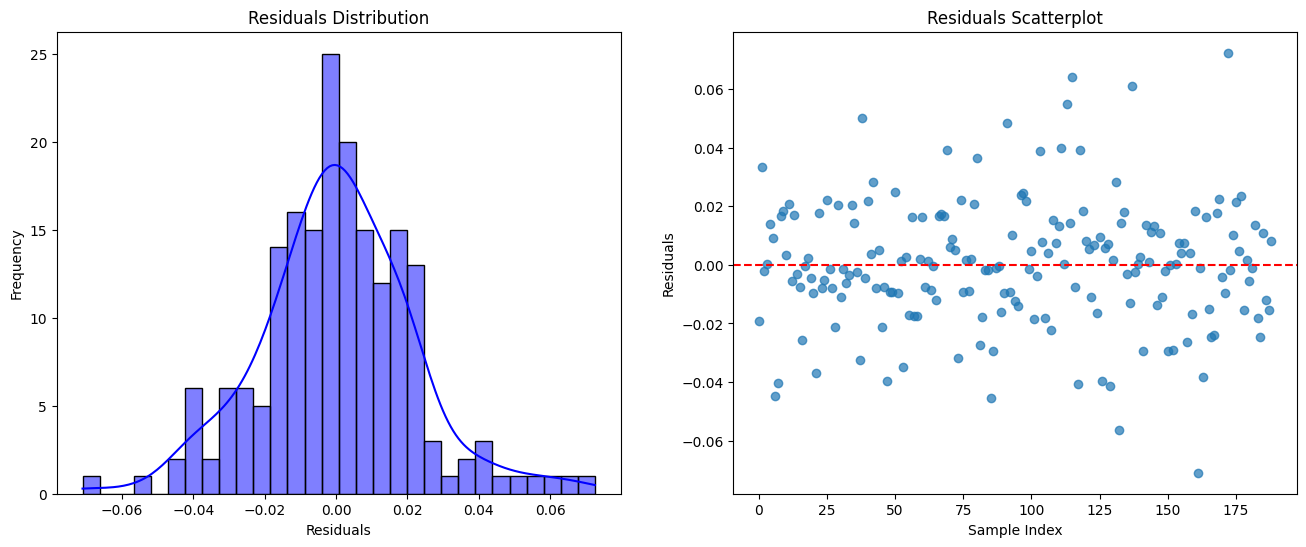

Mean of residuals: 0.00020610283640904627
Standard deviation of residuals: 0.021572567204714625


In [ ]:
# Calculate residuals
gru_y_pred = gru_y_pred.flatten()  # Converts (209, 1) to (209,)
gru_residuals = gru_y_test - gru_y_pred

# Size of Graphs
plt.figure(figsize=(16, 6))

# Residuals distribution
plt.subplot(1, 2, 1)
sns.histplot(gru_residuals, kde=True, bins=30, color="blue")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Residuals scatterplot
plt.subplot(1, 2, 2)
plt.scatter(range(len(gru_residuals)), gru_residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals Scatterplot")
plt.xlabel("Sample Index")
plt.ylabel("Residuals")

plt.show()

# Normality check
print("Mean of residuals:", np.mean(gru_residuals))
print("Standard deviation of residuals:", np.std(gru_residuals))

### QQ-Plot

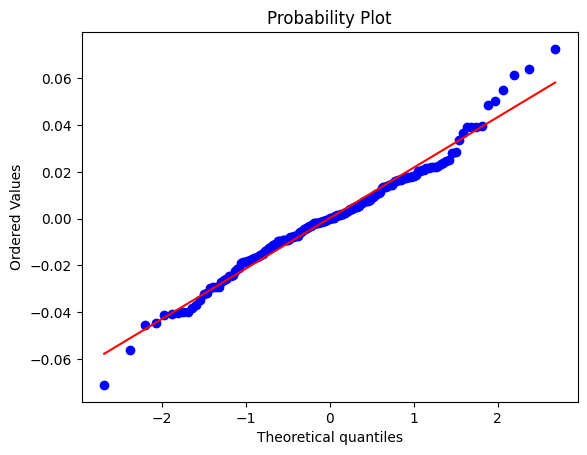

In [ ]:
stats.probplot(gru_residuals, dist="norm", plot=pylab)
pylab.show()

## GRU : Some other Overfiting Tests

### Asset for Test

In [ ]:
# Data we want to predict
asset = 'TSLA' # TESLA
asset_src = 'Close'
targeted_data = clean_data[(asset_src, asset)].values  # Targeted Data
# features = clean_data.drop(columns=[('Close', '^TNX')]).values  # Other colomns as Features
features = clean_data[
    [
        ('Open', asset),
        ('High', asset),
        ('Low', asset),
        ('Close', 'DX-Y.NYB'),
        ('Close', '^IXIC'),
        ('Close', 'CL=F'),
        ('Close', 'GC=F'),
        (asset, 'SMA_20'),
        (asset, 'Upper_Band'),
        (asset, 'Lower_Band'),
    ]
].values  # Other colomns as Features

# Data Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.hstack((targeted_data.reshape(-1, 1), features)))

# Function to create sequences with lag of the ADF Test & ACF Function
def create_sequences(data, target, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i])  # Sequences with `lag` : [t - lag; t]
        y.append(target[i])  # Present Value (t+1)
    return np.array(X), np.array(y)

# Creation of Sequences
lag = 100
X_asset, y_asset = create_sequences(scaled_data[:, 1:], scaled_data[:, 0], lag)

y_pred_asset = gru_model.predict(X_asset)

NameError: name 'clean_data' is not defined

### Reference Asset (S&P500)

In [ ]:
# Data we want to predict
ref_asset = '^GSPC'
ref_src = 'Close'
targeted_data = clean_data[(ref_src, ref_asset)].values  # Targeted Data
# features = clean_data.drop(columns=[('Close', '^GSPC')]).values  # Other colomns as Features
features = clean_data[
    [
        ('Open', ref_asset),
        ('High', ref_asset),
        ('Low', ref_asset),
        ('Close', 'DX-Y.NYB'),
        ('Close', '^IXIC'),
        ('Close', 'CL=F'),
        ('Close', 'GC=F'),
        (ref_asset, 'SMA_20'),
        (ref_asset, 'Upper_Band'),
        (ref_asset, 'Lower_Band'),
    ]
].values  # Other colomns as Features

# Data Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.hstack((targeted_data.reshape(-1, 1), features)))

# Function to create sequences with lag of the ADF Test & ACF Function
def create_sequences(data, target, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i])  # Sequences with `lag` : [t - lag; t]
        y.append(target[i])  # Present Value (t+1)
    return np.array(X), np.array(y)

# Creation of Sequences
lag = 100
X_ref, y_ref = create_sequences(scaled_data[:, 1:], scaled_data[:, 0], lag)

y_pred_ref = gru_model.predict(X_ref)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


### Ploting results

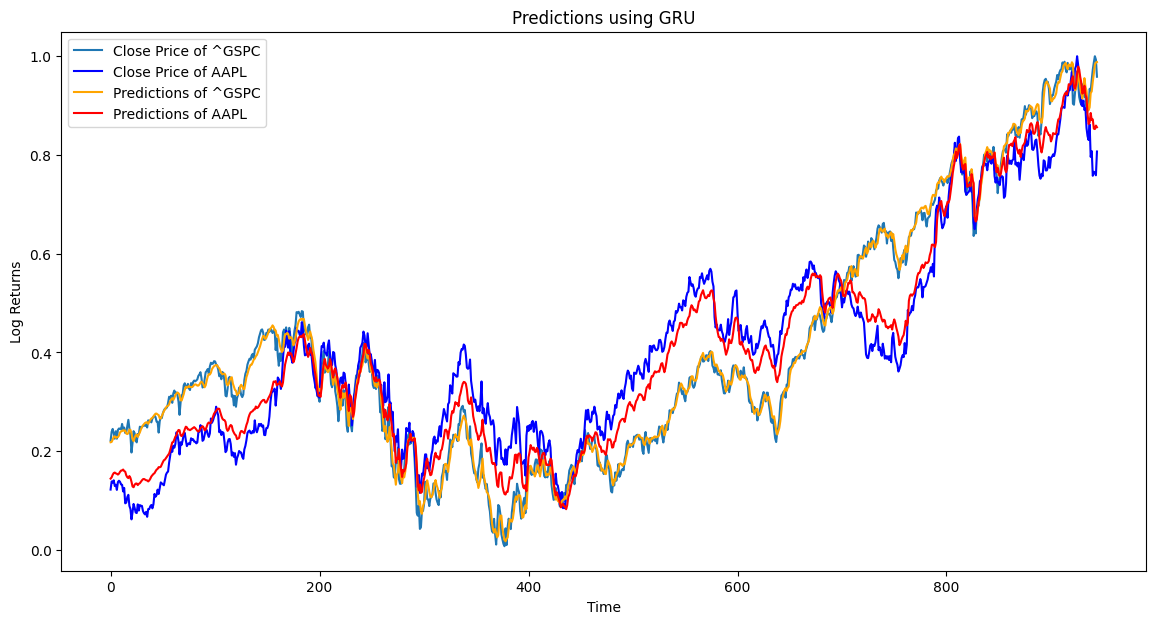

In [ ]:
# Visualization of predictions vs Log Returns
plt.figure(figsize=(14, 7))
plt.plot(y_ref, label=f'{ref_src} Price of {ref_asset}')
plt.plot(y_asset, label=f'{asset_src} Price of {asset}', color='blue')
plt.plot(y_pred_ref, label=f'Predictions of {ref_asset}', color='orange')
plt.plot(y_pred_asset, label=f'Predictions of {asset}', color='red')
plt.title('Predictions using GRU')
plt.xlabel('Time')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

--------------------------------------------------------------------

--------------------------------------------------------------------

#PROPHET

## Import Packages

In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

##Prophet : Model

### Data to predict

In [6]:
# Download data from Yahoo Finance for the ^GSPC (S&P 500 index)
data = yf.download(tickers='^GSPC', period='max', interval='1d')

# We are interested in the 'Close' price, and the index is already the Date
prophet_data = np.log(data[data.index >= '2019-01-01'][['Close']]/data[data.index >= '2019-01-01'][['Close']].shift(-1)).reset_index()  # Reset the index to make 'Date' a column

# Rename the columns to match Prophet's expected format: 'ds' for dates and 'y' for values
prophet_data.columns = ['ds', 'y']

# Ensure that the 'ds' column (dates) is in datetime format
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'], errors='coerce')

# Check for any invalid dates (NaT or null values) and handle them
if prophet_data['ds'].isnull().any():
    prophet_data = prophet_data.dropna(subset=['ds'])

# Handle missing values in 'y' (Close)
if prophet_data['y'].isnull().any():
    prophet_data['y'].fillna(method='ffill', inplace=True)

# Normalize the data (optional, Prophet works with raw values too)
scaler = MinMaxScaler(feature_range=(0, 1))
prophet_data['y'] = scaler.fit_transform(prophet_data[['y']])

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
<ipython-input-6-2bad6ceb8bfa>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prophet_data['y'].fillna(method='ffill', inplace=True)
<ipython-input-6-2bad6ceb8bfa>:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prophet_data['y'].fillna(method='ffill', inplace=True)


### Model

In [7]:
# Create and train the Prophet model
prophet_model = Prophet()

# Fit the model
prophet_model.fit(prophet_data)

# Make predictions for future dates (365 days in this case)
future = prophet_model.make_future_dataframe(periods=365)

# Forecast the future
forecast = prophet_model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqqnjfad0/7ht14mug.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqqnjfad0/d5q_dcak.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81609', 'data', 'file=/tmp/tmpqqnjfad0/7ht14mug.json', 'init=/tmp/tmpqqnjfad0/d5q_dcak.json', 'output', 'file=/tmp/tmpqqnjfad0/prophet_modelxwv0by5s/prophet_model-20250307173026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:30:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:30:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Ploting Results

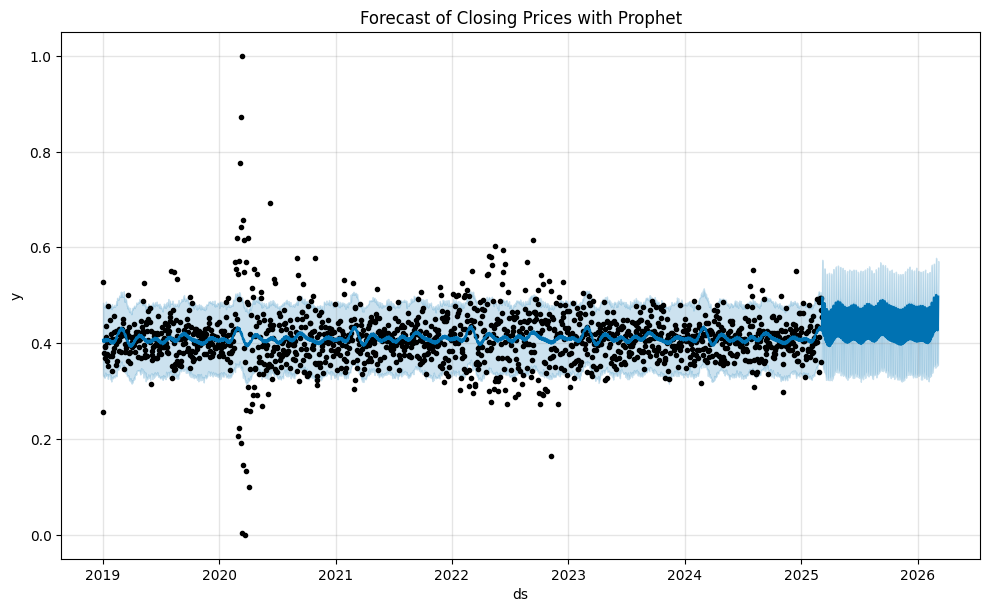

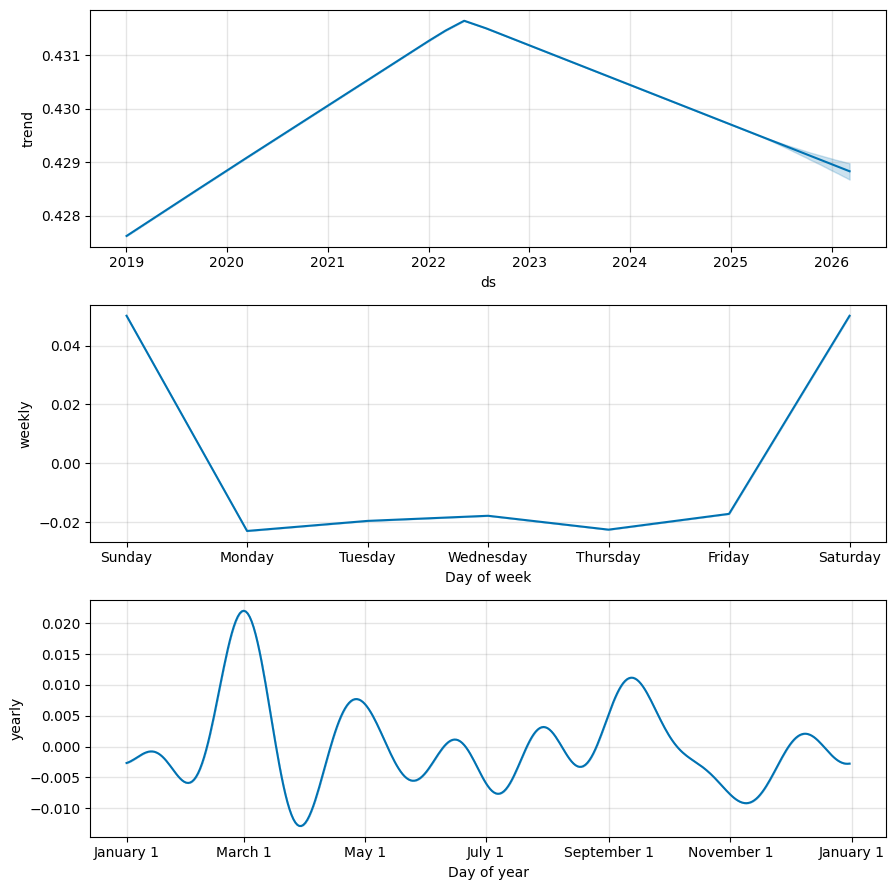

             ds      yhat  yhat_lower  yhat_upper
1914 2026-03-03  0.003976   -0.012183    0.020170
1915 2026-03-04  0.004245   -0.011436    0.019165
1916 2026-03-05  0.003066   -0.012787    0.018902
1917 2026-03-06  0.004034   -0.012335    0.019300
1918 2026-03-07  0.018427    0.003940    0.034559


In [8]:
# Plot the forecast
prophet_model.plot(forecast)
plt.title('Forecast of Closing Prices with Prophet')
plt.show()

# Plot the components (trend, seasonality)
prophet_model.plot_components(forecast)
plt.show()

# Convert predictions back to the original scale (inverse of MinMaxScaler)
forecast['yhat'] = scaler.inverse_transform(forecast[['yhat']])
forecast['yhat_lower'] = scaler.inverse_transform(forecast[['yhat_lower']])
forecast['yhat_upper'] = scaler.inverse_transform(forecast[['yhat_upper']])

# Display the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

### RMSE & MAE (Evalution)

In [17]:
def evaluation_rmse_mae_prophet(model, X_train, y_train, y_test, y_pred):
    # Convert X_train to DataFrame with 'ds' and 'y' columns for Prophet
    X_train_prophet = pd.DataFrame({'ds': X_train, 'y': y_train})

    # Evaluate the model using the training data (predict on X_train)
    mse_train = mean_squared_error(y_train, model.predict(X_train_prophet)['yhat'])
    mae_train = mean_absolute_error(y_train, model.predict(X_train_prophet)['yhat'])

    # Evaluate the model using the predicted test data (y_pred)
    mse_pred = mean_squared_error(y_test, y_pred)
    mae_pred = mean_absolute_error(y_test, y_pred)

    # Naive model (assuming previous value as prediction)
    mse_pred_naive = mean_squared_error(y_test[1:], y_test[:-1])
    mae_pred_naive = mean_absolute_error(y_test[1:], y_test[:-1])

    xlabel = ['MSE', 'MAE', 'MSE Ratio']
    bar_width = 0.20
    index = np.arange(len(xlabel))

    plt.bar(index,
            [mse_train, mae_train, mse_pred / mse_train],
            bar_width,
            color='orange',
            label='Train Data')

    plt.bar(index + bar_width,
            [mse_pred, mae_pred, mae_pred / mae_train],
            bar_width,
            color='red',
            label='Test Data')

    plt.bar(index + 2 * bar_width,
            [mse_pred_naive, mae_pred_naive, 0],
            bar_width,
            color='White',
            edgecolor='black',
            label='Naive Method')

    plt.xlabel('Metrics')
    plt.ylabel('Value of Metrics')
    plt.title("Use MSE, MAE and Ratio to Detect a Potential Overfitting &" + "\n" + "Compare Performance with a Naive Model")
    plt.xticks(index + bar_width / 2, labels=xlabel)
    plt.legend()
    plt.figure(figsize=(8, 6))

    # Print the error metrics
    print(f"Mean Squared Error (MSE), for Train: {mse_train}")
    print(f"Mean Absolute Error (MAE), for Train: {mae_train} \n")
    print(f"Mean Squared Error (MSE), for Test: {mse_pred}")
    print(f"Mean Absolute Error (MAE), for Test: {mae_pred} \n")
    print(f"Mean Squared Error (MSE), naive method: {mse_pred_naive}")
    print(f"Mean Absolute Error (MAE), naive method: {mae_pred_naive} \n")
    print(f"MSE Ratio : MSE Prediction over MSE Train (MSER): {mse_pred / mse_train}")
    print(f"MAE Ratio : MAE Prediction over MAE Train (MAER): {mae_pred / mae_train}")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqz1zidyl/kw4dk2b3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqz1zidyl/5gh6k4jm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11029', 'data', 'file=/tmp/tmpqz1zidyl/kw4dk2b3.json', 'init=/tmp/tmpqz1zidyl/5gh6k4jm.json', 'output', 'file=/tmp/tmpqz1zidyl/prophet_model4o6a25y0/prophet_model-20250306220045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:00:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:00:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Squared Error (MSE), for Train: 0.0010937806410739558
Mean Absolute Error (MAE), for Train: 0.022607321416380187 

Mean Squared Error (MSE), for Test: 0.003654869989939602
Mean Absolute Error (MAE), for Test: 0.052590205993939945 

Mean Squared Error (MSE), naive method: 8.657831952698221e-05
Mean Absolute Error (MAE), naive method: 0.007539149325596494 

MSE Ratio : MSE Prediction over MSE Train (MSER): 3.341501808215381
MAE Ratio : MAE Prediction over MAE Train (MAER): 2.326246662545152


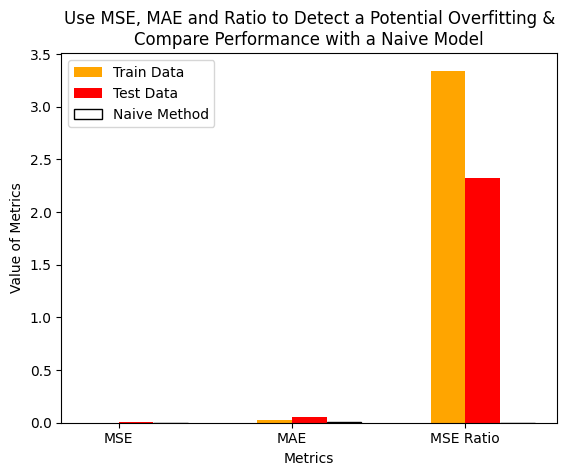

<Figure size 800x600 with 0 Axes>

In [18]:
# Train and test the Prophet model
train_data = prophet_data[:-30]
test_data = prophet_data[-30:]

prophet_model = Prophet()
prophet_model.fit(train_data)

# Forecast for the test data
future_test = prophet_model.make_future_dataframe(test_data.shape[0])
forecast_test = prophet_model.predict(future_test)

# Extract the predicted values
y_pred = forecast_test['yhat'].iloc[-30:].values

# The actual target values for the test set
y_test = test_data['y'].values

# Now call the evaluation function
evaluation_rmse_mae_prophet(prophet_model, X_train=train_data['ds'], y_train=train_data['y'], y_test=y_test, y_pred=y_pred)


--------------------------------------------------------------------

--------------------------------------------------------------------

# MOIRAI (by SALESFORECE)

As MOIRAI is a huge model, we create it in an other google colab, otherwise, this one crashed.

Here the colab : https://colab.research.google.com/drive/1YHcW0ISR79qBWJaiIhRgAGUcLyIuk-Zs#scrollTo=O2iziPMaWXCB

--------------------------------------------------------------------

--------------------------------------------------------------------

# SOURCE

## Packages Source

STATISTICS :

- Ducker Fuller Test : https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
- ACF Function : https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html
- PACF Function : https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html
- ARIMA : https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html
- AUTO-ARIMA : https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html


TECHNICAL ANALYSIS :

- MACD / RSI : https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html


PINGOUIN :

- Partial Correlation : https://pingouin-stats.org/build/html/generated/pingouin.partial_corr.html



## Model Source

COMPLEX MODELS :

- Hugging Face, Time Series Forecasting Models : https://huggingface.co/models?pipeline_tag=time-series-forecasting

- Prophet by META : https://facebook.github.io/prophet/docs/quick_start.html

- Granite, by IBM : https://huggingface.co/ibm-granite/granite-timeseries-ttm-r2

- Moirai by SalesForce : https://huggingface.co/Salesforce/moirai-1.0-R-base


CLASSICAL MODELS :

- Random Forest : https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb

- GBoost : https://colab.research.google.com/github/lewtun/hepml/blob/master/notebooks/lesson04_intro-to-gradient-boosting.ipynb

- XGBoost : https://colab.research.google.com/github/kirenz/regression/blob/main/docs/xgboost-regression.ipynb

- RNN : https://colab.research.google.com/github/tensorflow/docs/blob/snapshot-keras/site/en/guide/keras/rnn.ipynb

- LSTM : https://colab.research.google.com/github/Pseudo-Lab/Tutorial-Book-en/blob/master/book/chapters/en/time-series/Ch4-LSTM.ipynb // https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M3_LSTM_Tutorial_v3.ipynb

- GRU : https://colab.research.google.com/github/djcordhose/ai/blob/master/notebooks/tensorflow/sentiment-gru.ipynb // https://colab.research.google.com/github/d2l-ai/d2l-pytorch-colab/blob/master/chapter_recurrent-modern/gru.ipynb


## Other Sources

- Cours de Centrale (cours en option Data, cours de Statistique et la filière métier ADAD)

- Association Christopher.ai

- Cours M2 Data Amu